In [2]:
#Cargamos librerias
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

#cm = plt.cm.RdBu
#cm_bright = ListedColormap(['#FF0000', '#0000FF'])

import warnings
warnings.filterwarnings('ignore')

In [3]:
#leemos DF
data = pd.read_csv('./airbnb-listings-extract.csv',sep=';', decimal='.')
data.head().T

,0,1,2,3,4
ID,11210388,17471131,17584891,5398030,18104606
Listing Url,https://www.airbnb.com/rooms/11210388,https://www.airbnb.com/rooms/17471131,https://www.airbnb.com/rooms/17584891,https://www.airbnb.com/rooms/5398030,https://www.airbnb.com/rooms/18104606
Scrape ID,20170306202425,20170407214050,20170407214050,20170407214050,20170407214050
Last Scraped,2017-03-07,2017-04-08,2017-04-08,2017-04-08,2017-04-08
Name,The Loft-Full Bath-Deck w/View,"Claris I, Friendly Rentals","Style Terrace Red, Friendly Rentals",Picasso Suite 1.4 Paseo de Gracia,Smart City Centre Apartment II
...,...,...,...,...,...
Cancellation Policy,moderate,super_strict_30,super_strict_30,strict,flexible
Calculated host listings count,1.0,106.0,106.0,24.0,92.0
Reviews per Month,3.5,0.86,NaN,1.09,NaN
Geolocation,"30.3373609355,-97.8632766782","41.3896829422,2.17262543017","41.3930345489,2.16217327868","41.3969668101,2.1674178103","41.3886851936,2.15514963616"


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14780 entries, 0 to 14779
Data columns (total 89 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              14780 non-null  int64  
 1   Listing Url                     14780 non-null  object 
 2   Scrape ID                       14780 non-null  int64  
 3   Last Scraped                    14780 non-null  object 
 4   Name                            14779 non-null  object 
 5   Summary                         14189 non-null  object 
 6   Space                           10888 non-null  object 
 7   Description                     14774 non-null  object 
 8   Experiences Offered             14780 non-null  object 
 9   Neighborhood Overview           9134 non-null   object 
 10  Notes                           5644 non-null   object 
 11  Transit                         9066 non-null   object 
 12  Access                          

In [5]:
set(data.duplicated())
#no hay dupllicados a este nivel (just in case)

{False}

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

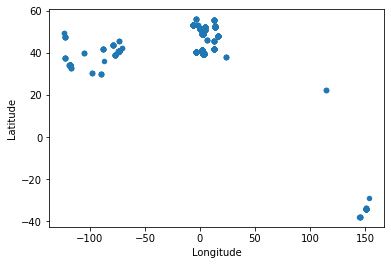

In [6]:
data.plot(x='Longitude',y='Latitude', kind = 'scatter')
#segun una busqueda en google, madrid esta muy cerca del 40.5 y -3.7 asi que dado
#que tengo que deshacerme de columnas por ahora voy a solo dejar latitud y longitud y luego filtrare

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

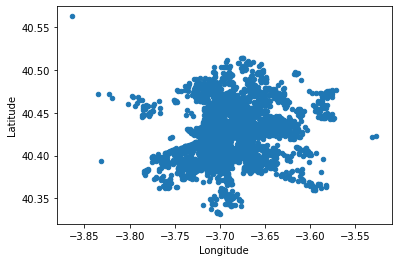

In [7]:
#antes de divir train y test utilizaremos las coordenadas maximas y minimas de la comunidad de madrid (estimadas) para filtrar
madrid = data
madrid = madrid.loc[(madrid['Latitude'] >= 39.8) & (madrid['Latitude'] <= 41.2)]
madrid = madrid.loc[(madrid['Longitude'] >= -4.6) & (madrid['Longitude'] <= -3)]
madrid.plot(x='Longitude',y='Latitude', kind = 'scatter')
#en teoria estas instancias debiesen estras en el cuadrado que sae extiendo en las coodenadas maximas de lat y long de madrid (comunidad)
#esto lo he hecho por que se supone que el problema es predecir precios de viviendas de alquiler en airbnbn madrid

In [8]:
madrid.to_csv('./madrid.csv', sep=';', decimal='.', index=False)

In [9]:
from sklearn.model_selection import train_test_split

full_df = pd.read_csv('./madrid.csv', sep=';', decimal='.')

train, test = train_test_split(full_df, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

train.to_csv('./train.csv', sep=';', decimal='.', index=False)
test.to_csv('./test.csv', sep=';', decimal='.', index=False)

df = pd.read_csv('./train.csv', sep=';', decimal='.')

Dimensiones del dataset de training: (10668, 89)
Dimensiones del dataset de test: (2667, 89)


In [10]:
#ahora si, con datos de Madrid, voy a proceder con feature seleccion.
#primero borraremos columnas que claramente no serviran para nada o son redundates con otras

In [11]:
df[['Listing Url','Scrape ID','Last Scraped','Thumbnail Url',
                         'Medium Url','Picture Url','XL Picture Url', 'Host URL',
                        'Host Thumbnail Url','Host Picture Url','Calendar last Scraped']]

,Listing Url,Scrape ID,Last Scraped,Thumbnail Url,Medium Url,Picture Url,XL Picture Url,Host URL,Host Thumbnail Url,Host Picture Url,Calendar last Scraped
0,https://www.airbnb.com/rooms/17735333,20170407214119,2017-04-08,https://a0.muscache.com/im/pictures/1e3a6f33-1...,https://a0.muscache.com/im/pictures/1e3a6f33-1...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/1e3a6f33-1...,https://www.airbnb.com/users/show/31083349,https://a0.muscache.com/im/users/31083349/prof...,https://a0.muscache.com/im/users/31083349/prof...,2017-04-07
1,https://www.airbnb.com/rooms/14424850,20170407214119,2017-04-08,https://a0.muscache.com/im/pictures/9cb71b04-c...,https://a0.muscache.com/im/pictures/9cb71b04-c...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/9cb71b04-c...,https://www.airbnb.com/users/show/86771436,https://a0.muscache.com/im/pictures/ccb71faf-6...,https://a0.muscache.com/im/pictures/ccb71faf-6...,2017-04-07
2,https://www.airbnb.com/rooms/8728121,20170407214119,2017-04-08,https://a0.muscache.com/im/pictures/110731977/...,https://a0.muscache.com/im/pictures/110731977/...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/110731977/...,https://www.airbnb.com/users/show/24886571,https://a0.muscache.com/im/pictures/7bc701ea-d...,https://a0.muscache.com/im/pictures/7bc701ea-d...,2017-04-08
3,https://www.airbnb.com/rooms/17462023,20170407214119,2017-04-08,https://a0.muscache.com/im/pictures/dcf8856f-8...,https://a0.muscache.com/im/pictures/dcf8856f-8...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/dcf8856f-8...,https://www.airbnb.com/users/show/104948419,https://a0.muscache.com/im/pictures/6f828ca7-4...,https://a0.muscache.com/im/pictures/6f828ca7-4...,2017-04-08
4,https://www.airbnb.com/rooms/14913490,20170407214119,2017-04-08,https://a0.muscache.com/im/pictures/962beae9-b...,https://a0.muscache.com/im/pictures/962beae9-b...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/962beae9-b...,https://www.airbnb.com/users/show/12859487,https://a0.muscache.com/im/pictures/3cc674d2-a...,https://a0.muscache.com/im/pictures/3cc674d2-a...,2017-04-07
...,...,...,...,...,...,...,...,...,...,...,...
10663,https://www.airbnb.com/rooms/963302,20170407214119,2017-04-08,https://a0.muscache.com/im/pictures/14849788/d...,https://a0.muscache.com/im/pictures/14849788/d...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/14849788/d...,https://www.airbnb.com/users/show/5249235,https://a0.muscache.com/im/pictures/bccce194-0...,https://a0.muscache.com/im/pictures/bccce194-0...,2017-04-08
10664,https://www.airbnb.com/rooms/6303708,20170407214119,2017-04-08,https://a0.muscache.com/im/pictures/82039033/5...,https://a0.muscache.com/im/pictures/82039033/5...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/82039033/5...,https://www.airbnb.com/users/show/1450405,https://a0.muscache.com/im/users/1450405/profi...,https://a0.muscache.com/im/users/1450405/profi...,2017-04-08
10665,https://www.airbnb.com/rooms/9384541,20170407214119,2017-04-08,https://a0.muscache.com/im/pictures/ef1dcf4a-5...,https://a0.muscache.com/im/pictures/ef1dcf4a-5...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/ef1dcf4a-5...,https://www.airbnb.com/users/show/16655057,https://a0.muscache.com/im/pictures/37727fbd-4...,https://a0.muscache.com/im/pictures/37727fbd-4...,2017-04-08
10666,https://www.airbnb.com/rooms/17491882,20170407214119,2017-04-08,https://a0.muscache.com/im/pictures/79ecc863-c...,https://a0.muscache.com/im/pictures/79ecc863-c...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/79ecc863-c...,https://www.airbnb.com/users/show/25315846,https://a0.muscache.com/im/pictures/744699df-d...,https://a0.muscache.com/im/pictures/744699df-d...,2017-04-08


In [12]:
#primero sacamos todas las columnas que tengan relacion a la extraccion de datos, como urls o fechas relacionadas a esto..
df = df.drop(['Listing Url','Scrape ID','Last Scraped','Thumbnail Url',
                         'Medium Url','Picture Url','XL Picture Url', 'Host URL',
                        'Host Thumbnail Url','Host Picture Url','Calendar last Scraped'], axis=1)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 78 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              10668 non-null  int64  
 1   Name                            10668 non-null  object 
 2   Summary                         10259 non-null  object 
 3   Space                           7743 non-null   object 
 4   Description                     10663 non-null  object 
 5   Experiences Offered             10668 non-null  object 
 6   Neighborhood Overview           6646 non-null   object 
 7   Notes                           4010 non-null   object 
 8   Transit                         6603 non-null   object 
 9   Access                          6024 non-null   object 
 10  Interaction                     5989 non-null   object 
 11  House Rules                     6927 non-null   object 
 12  Host ID                         

In [14]:
#muchas columnas parecen estar llenas de texto
df.describe(exclude=[np.number]).T

,count,unique,top,freq
Name,10668,10400,Apartamento en el centro de Madrid,10
Summary,10259,9701,"Mi alojamiento es bueno para parejas, aventure...",16
Space,7743,7278,Los Apartamentos Good Stay Prado se encuentran...,23
Description,10663,10353,Es un piso con 6 habitaciones de las que 5 ha...,14
Experiences Offered,10668,1,none,10668
Neighborhood Overview,6646,5856,Se trata de una de las zonas más emblemáticas ...,30
Notes,4010,3334,Apartamentos Temporales has over 100 apartment...,45
Transit,6603,5782,"It is calm, quite zone and you don’t have to s...",29
Access,6024,5204,"Wifi, TV, washing machine, Microwave, full equ...",41
Interaction,5989,4873,We will arrange the check in time depending on...,52


In [15]:
#algunas claramente no me van a servir para nada en este ejercicio y ademas, 
#casi que hay un texto para cada apartamento en algunas columnas

df = df.drop(['Name','Summary','Space','Description','Experiences Offered',
                  'Neighborhood Overview','Neighborhood Overview','Notes','Transit',
                 'Access','Interaction','House Rules','Host Name','Host Location',
                 'Host About','Host Neighbourhood','Host Verifications','Street',
                  'Amenities','Geolocation','Calendar Updated','Features'], axis=1)

In [16]:
df.shape

(10668, 57)

In [17]:
#y si vemos las que no son texto?
df.describe(exclude=[np.object]).T

,count,mean,std,min,25%,50%,75%,max
ID,10668.0,1.037174e+07,5.538659e+06,18628.000000,5.774822e+06,1.147228e+07,1.533718e+07,1.810984e+07
Host ID,10668.0,3.755022e+07,3.468266e+07,19854.000000,7.595998e+06,2.739450e+07,5.772806e+07,1.247534e+08
Host Response Rate,9306.0,9.485568e+01,1.522109e+01,0.000000,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
Host Acceptance Rate,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Host Listings Count,10665.0,9.792030e+00,2.778784e+01,0.000000,1.000000e+00,2.000000e+00,5.000000e+00,5.190000e+02
Host Total Listings Count,10665.0,9.792030e+00,2.778784e+01,0.000000,1.000000e+00,2.000000e+00,5.000000e+00,5.190000e+02
Latitude,10668.0,4.042062e+01,2.022133e-02,40.331888,4.041008e+01,4.041864e+01,4.042774e+01,4.056274e+01
Longitude,10668.0,-3.697213e+00,2.386636e-02,-3.863907,-3.707833e+00,-3.701588e+00,-3.693828e+00,-3.526821e+00
Accommodates,10668.0,3.175947e+00,1.988406e+00,1.000000,2.000000e+00,2.000000e+00,4.000000e+00,1.600000e+01
Bathrooms,10624.0,1.249765e+00,5.942236e-01,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00


In [18]:
#creo que por ahora las unicas que no me va a servir para este ejercicio son ID y host ID, pero por otra parte weekly y monthly price son redundantes con precio seguramente.
df = df.drop(['ID','Host ID','Weekly Price','Monthly Price'], axis=1)

In [19]:
df[df['Host Listings Count'] != df['Host Total Listings Count']][['Host Listings Count','Host Total Listings Count','Calculated host listings count']].describe()

,Host Listings Count,Host Total Listings Count,Calculated host listings count
count,0.0,0.0,3.0
mean,NaN,NaN,1.0
std,NaN,NaN,0.0
min,NaN,NaN,1.0
25%,NaN,NaN,1.0
50%,NaN,NaN,1.0
75%,NaN,NaN,1.0
max,NaN,NaN,1.0


In [20]:
df[df['Host Listings Count'] == df['Host Total Listings Count']][['Host Listings Count','Host Total Listings Count','Calculated host listings count']].describe()

,Host Listings Count,Host Total Listings Count,Calculated host listings count
count,10665.000000,10665.000000,10665.000000
mean,9.792030,9.792030,7.652789
std,27.787835,27.787835,19.775203
min,0.000000,0.000000,1.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,5.000000,5.000000,4.000000
max,519.000000,519.000000,145.000000


In [21]:
#aqui hay algo raro, al parecer los datos originales incluian host sin listings, 
#lo que no tiene sentido, asi que se calculo para que tengan un minimo de 1 y no 0.
#por otra parte, el host listing count y el total host listing count, son practicamente iguales.
#solo se diferencian en unos datos que son NaNs
#dejare solo la calculated listings counts ya que las otras columnas son redundantes.

df = df.drop(['Host Listings Count','Host Total Listings Count'], axis=1)


In [22]:
#hay columnas con muchos NAs, las removemos si es que mas del 90% de sus valores son NAs. estos no me serviran ni para train ni test
cols_to_delete_by_nulls = df.columns[df.isnull().sum()/len(df) > .90]
#cols_to_delete_by_nulls
df.drop(cols_to_delete_by_nulls, axis = 1, inplace = True)
#aqui creo que no hay data leakeage ya que son columnas casi sin datos y estas no me quitan instancias

In [23]:
df.shape

(10668, 46)

In [24]:
#por ahora lo que mas me preocupa son las columnas con datos tipo object y la redundacia que podria tener
df.describe(exclude=[np.number]).T

,count,unique,top,freq
Host Since,10665,1997,2014-09-19,121
Host Response Time,9306,4,within an hour,5721
Neighbourhood,7034,65,Malasaña,741
Neighbourhood Cleansed,10668,126,Embajadores,1496
Neighbourhood Group Cleansed,10668,21,Centro,5475
City,10663,32,Madrid,10570
State,10633,26,Comunidad de Madrid,8457
Zipcode,10299,139,28012,1286
Market,10627,5,Madrid,10617
Smart Location,10668,34,"Madrid, Spain",10558


In [25]:
#todavia hay muchas columnas con cosas raras, sobre todo con temas de ubicacion.. empecemos por la mayor escala.
set(df['Country'])

{'Cuba', 'Spain', nan}

In [26]:
set(df['Country Code'])

{'CU', 'ES', 'It'}

In [27]:
set(df['State'])

{'28',
 'Alicante',
 'Autonome Gemeinschaft Madrid',
 'Barcelona',
 'Communauté de Madrid',
 'Community of Madrid',
 'Comunidad de Madrid',
 'España',
 'España,Madrid',
 'Espańa',
 'La Habana',
 'MADRID',
 'Madrid',
 'Madrid \nMadrid',
 'Madrid España',
 'Madrid capital',
 'Madrid, Spain',
 'Região Autônoma de Madrid',
 'Salerno Fisciano',
 'Spain',
 'Valencian Community',
 'madrid',
 nan,
 '西班牙',
 '馬德里自治區',
 '马德里',
 '马德里自治区'}

In [28]:
set(df['City'])

{'Aravaca (Madrid)',
 'Barcelona',
 'Boadilla del Monte',
 'Centro',
 'Centro, Madrid',
 'Chiva',
 'Chueca',
 'Chueca, Madrid',
 'Delicias',
 'Delicias-Madrid',
 'La Elipa',
 'La Habana',
 'MADRID',
 'Madid',
 'Madri',
 'Madrid',
 'Madrid, Comunidad de Madrid, ES',
 'Madrid, Vallecas (Fontarrón)',
 'Malaga',
 'Motilla del Palancar',
 'Málaga',
 'Onil',
 'Pozuelo',
 'Pozuelo de Alarcón',
 'Salerno',
 'San Fernando de Henares',
 'San Lázaro',
 'Ventas',
 'las matas  madrid',
 'madrid',
 nan,
 '馬德里',
 '马德里'}

In [29]:
set(df['Market'])

{'Deauville', 'London', 'Madrid', 'Other (International)', 'Toledo', nan}

In [30]:
set(df['Smart Location'])

{'Aravaca (Madrid), Spain',
 'Barcelona , Spain',
 'Boadilla del Monte, Spain',
 'Centro, Madrid, Spain',
 'Centro, Spain',
 'Chiva, Spain',
 'Chueca, Madrid, Spain',
 'Chueca, Spain',
 'Delicias, Spain',
 'Delicias-Madrid, Spain',
 'ES, Spain',
 'La Elipa, Spain',
 'La Habana, Cuba',
 'MADRID, Spain',
 'Madid, Spain',
 'Madri, Spain',
 'Madrid , Spain',
 'Madrid, Comunidad de Madrid, ES, Spain',
 'Madrid, Spain',
 'Madrid, Vallecas (Fontarrón), Spain',
 'Malaga, Spain',
 'Motilla del Palancar, Spain',
 'Málaga, Spain',
 'Onil, Spain',
 'Pozuelo de Alarcón, Spain',
 'Pozuelo, Spain',
 'Salerno',
 'San Fernando de Henares, Spain',
 'San Lázaro, Spain',
 'Ventas, Spain',
 'las matas  madrid, Spain',
 'madrid, Spain',
 '馬德里, Spain',
 '马德里, Spain'}

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

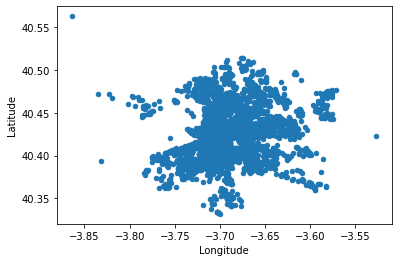

In [31]:
df.plot(x='Longitude',y='Latitude', kind = 'scatter')
#claramente hay errores en las columnas de ubicacion, asumiendo que la lat y long son los datos correctos. desechare las otras columnas

In [32]:
df = df.drop(['Country Code','Country','City','State','Zipcode',
                  'Market','Smart Location'], axis=1)

In [33]:
df.shape

(10668, 39)

In [34]:
#las columnas de barrios parecen redundantes dado que estos tienen una ubicacion y esta se deberia de relacionar con las coordenadas, tambien las borrare
df = df.drop(['Neighbourhood','Neighbourhood Cleansed','Neighbourhood Group Cleansed'], axis = 1)

In [35]:
df.describe(exclude=[np.number]).T

,count,unique,top,freq
Host Since,10665,1997,2014-09-19,121
Host Response Time,9306,4,within an hour,5721
Property Type,10668,21,Apartment,8762
Room Type,10668,3,Entire home/apt,6360
Bed Type,10668,5,Real Bed,10421
First Review,8446,1519,2017-02-26,49
Last Review,8446,660,2017-04-02,604
Cancellation Policy,10668,5,strict,4013


In [36]:
#las columnas de first review y last review creo que son redundantes con host since, ambas me aportarian info de cuanto tiempo ah estado activo el host. dejate solo host since
df = df.drop(['First Review','Last Review'], axis = 1)

In [37]:
df.describe(exclude=[np.object]).T

,count,mean,std,min,25%,50%,75%,max
Host Response Rate,9306.0,94.855685,15.221090,0.000000,100.000000,100.000000,100.000000,100.000000
Latitude,10668.0,40.420617,0.020221,40.331888,40.410080,40.418644,40.427745,40.562736
Longitude,10668.0,-3.697213,0.023866,-3.863907,-3.707833,-3.701588,-3.693828,-3.526821
Accommodates,10668.0,3.175947,1.988406,1.000000,2.000000,2.000000,4.000000,16.000000
Bathrooms,10624.0,1.249765,0.594224,0.000000,1.000000,1.000000,1.000000,8.000000
Bedrooms,10655.0,1.285312,0.815806,0.000000,1.000000,1.000000,1.000000,10.000000
Beds,10627.0,1.974687,1.498295,1.000000,1.000000,1.000000,2.000000,16.000000
Price,10661.0,66.993340,60.500843,9.000000,31.000000,52.000000,80.000000,875.000000
Security Deposit,4533.0,183.580852,109.583750,70.000000,100.000000,150.000000,200.000000,990.000000
Cleaning Fee,6296.0,29.511436,25.572148,4.000000,15.000000,25.000000,35.000000,500.000000


In [38]:
#creo que las columnas de reviews estan relacionadas ya que el review de la propiedad se calcula en base a distintos aspectos, 
#entonces los scores se utilizan para computar el rating y se deberian relacionar con value
#tambien, a mayor numero de reviews, imagino que sera mayor el numero de reviews al mes.

df = df.drop(['Reviews per Month','Review Scores Value','Review Scores Location',
                  'Review Scores Communication','Review Scores Checkin','Review Scores Cleanliness',
                 'Review Scores Accuracy'], axis = 1)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Host Since                      10665 non-null  object 
 1   Host Response Time              9306 non-null   object 
 2   Host Response Rate              9306 non-null   float64
 3   Latitude                        10668 non-null  float64
 4   Longitude                       10668 non-null  float64
 5   Property Type                   10668 non-null  object 
 6   Room Type                       10668 non-null  object 
 7   Accommodates                    10668 non-null  int64  
 8   Bathrooms                       10624 non-null  float64
 9   Bedrooms                        10655 non-null  float64
 10  Beds                            10627 non-null  float64
 11  Bed Type                        10668 non-null  object 
 12  Price                           

In [40]:
df.describe(exclude=[np.number]).T

,count,unique,top,freq
Host Since,10665,1997,2014-09-19,121
Host Response Time,9306,4,within an hour,5721
Property Type,10668,21,Apartment,8762
Room Type,10668,3,Entire home/apt,6360
Bed Type,10668,5,Real Bed,10421
Cancellation Policy,10668,5,strict,4013


In [41]:
df['Host Since'] = pd.to_datetime(df['Host Since'])

In [42]:
df['Years Being Host'] = df['Host Since'].apply(lambda x: 2017 - x.year)
df.head()

,Host Since,Host Response Time,Host Response Rate,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,...,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Cancellation Policy,Calculated host listings count,Years Being Host
0,2015-04-12,within an hour,100.0,40.410993,-3.697922,Condominium,Entire home/apt,4,1.0,1.0,...,1125,4,25,55,56,0,NaN,flexible,1.0,2.0
1,2016-07-29,within a day,90.0,40.437337,-3.711975,Apartment,Entire home/apt,3,1.0,2.0,...,1125,14,44,74,349,6,90.0,flexible,1.0,1.0
2,2014-12-16,NaN,NaN,40.435496,-3.670387,Apartment,Entire home/apt,2,1.0,1.0,...,1125,0,0,0,0,1,100.0,flexible,1.0,3.0
3,2016-11-23,within an hour,90.0,40.346730,-3.689988,Apartment,Shared room,1,1.0,1.0,...,1125,8,8,8,8,0,NaN,strict,3.0,1.0
4,2014-03-06,NaN,NaN,40.452755,-3.676187,Apartment,Entire home/apt,2,1.0,1.0,...,45,23,53,83,140,0,NaN,moderate,1.0,3.0


In [43]:
df = df.drop(['Host Since'], axis = 1)

<AxesSubplot:xlabel='Years Being Host', ylabel='Price'>

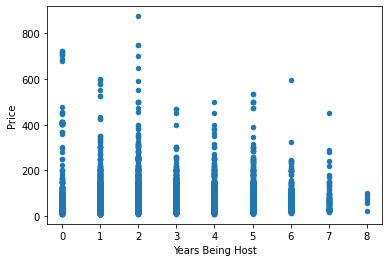

In [44]:
df.plot(kind = 'scatter',x='Years Being Host',y = 'Price')

In [45]:
df['Host Response Time'].value_counts()

within an hour        5721
within a few hours    2132
within a day          1241
a few days or more     212
Name: Host Response Time, dtype: int64

<AxesSubplot:title={'center':'Price'}, xlabel='Host Response Time'>

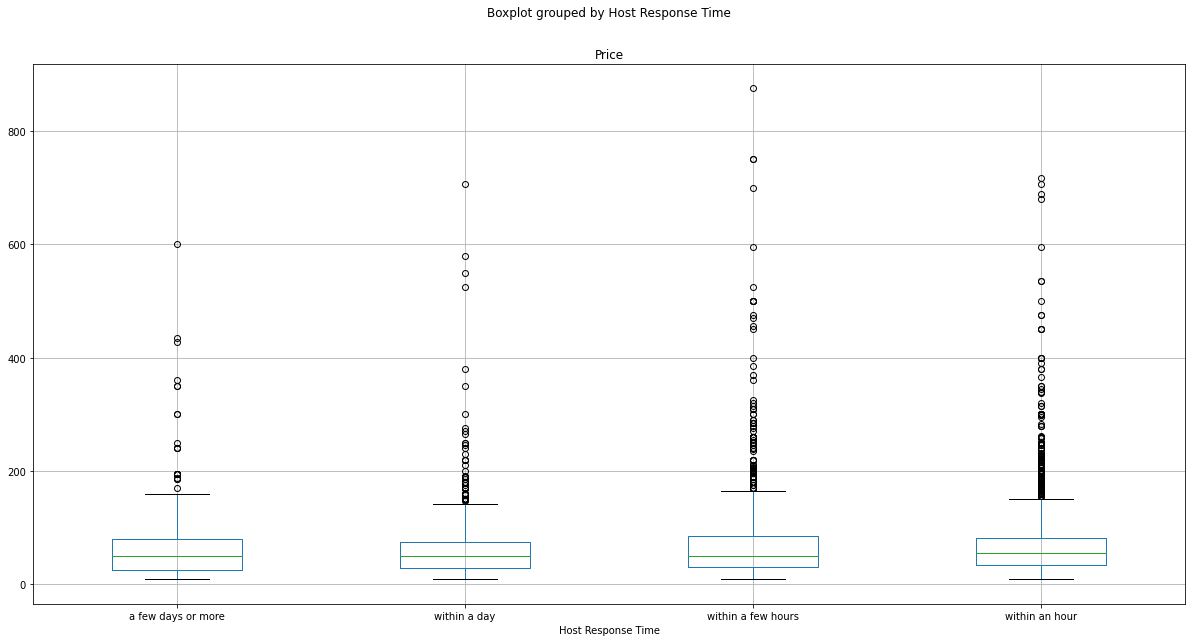

In [46]:
df.boxplot(by='Host Response Time', column='Price',figsize=(20, 10))

In [47]:
#dado que cada categoria involucra a la anterior, 
#es decir la categira entre una hora esta dentro de entre algunas hora
#he pensando en separarlas como el maximo que han demorado en terminos de horas, 
#sin embargo la categria a few days or more tiiene al infinito y podria ser que alguein no responda
#por esto, he decidido deshacerme de esta columna.

df = df.drop(['Host Response Time'], axis = 1)

In [48]:
df['Property Type'].value_counts()

Apartment             8762
House                  798
Condominium            283
Bed & Breakfast        278
Loft                   232
Other                  186
Dorm                    34
Guesthouse              29
Chalet                  17
Serviced apartment      13
Hostel                  12
Townhouse                8
Villa                    3
Guest suite              3
Earth House              2
Boutique hotel           2
Casa particular          2
Camper/RV                1
Tent                     1
Timeshare                1
Boat                     1
Name: Property Type, dtype: int64

<AxesSubplot:title={'center':'Price'}, xlabel='Property Type'>

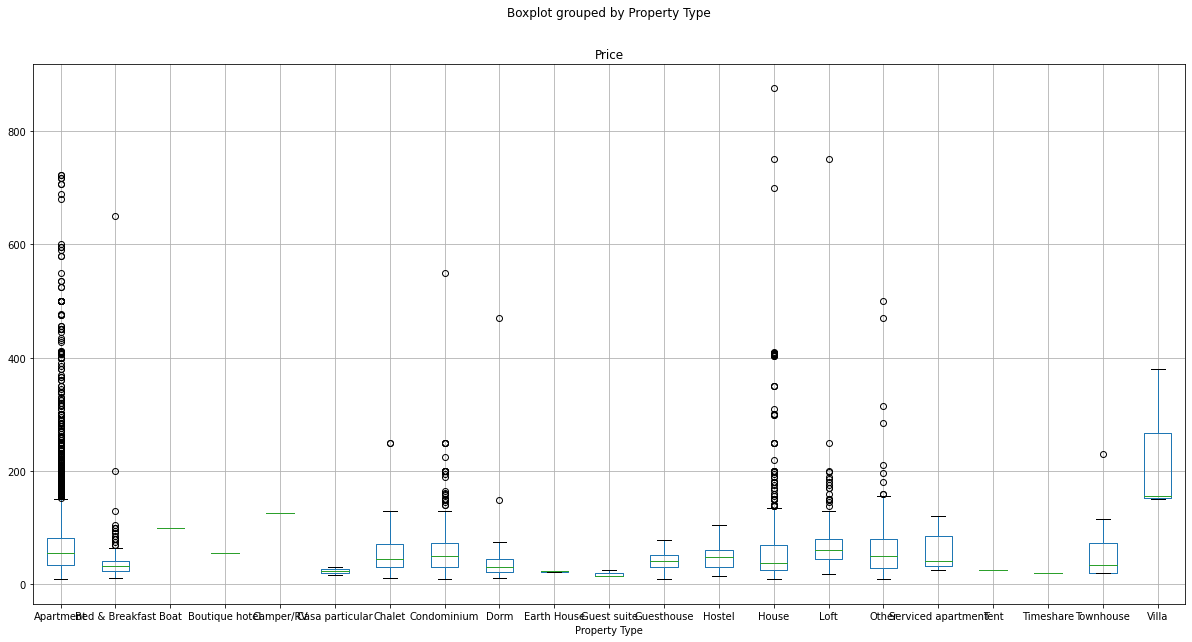

In [49]:
df.boxplot(by='Property Type', column='Price',figsize=(20, 10))

In [50]:
#en este caso, las categorias no siguen un orden de magnitud, no hay mayores ni menores
#al codificar esta variale se podrian causar errores asi que prefiero descartarla

df = df.drop(['Property Type'], axis = 1)

In [51]:
df['Room Type'].value_counts()

Entire home/apt    6360
Private room       4154
Shared room         154
Name: Room Type, dtype: int64

<AxesSubplot:title={'center':'Price'}, xlabel='Room Type'>

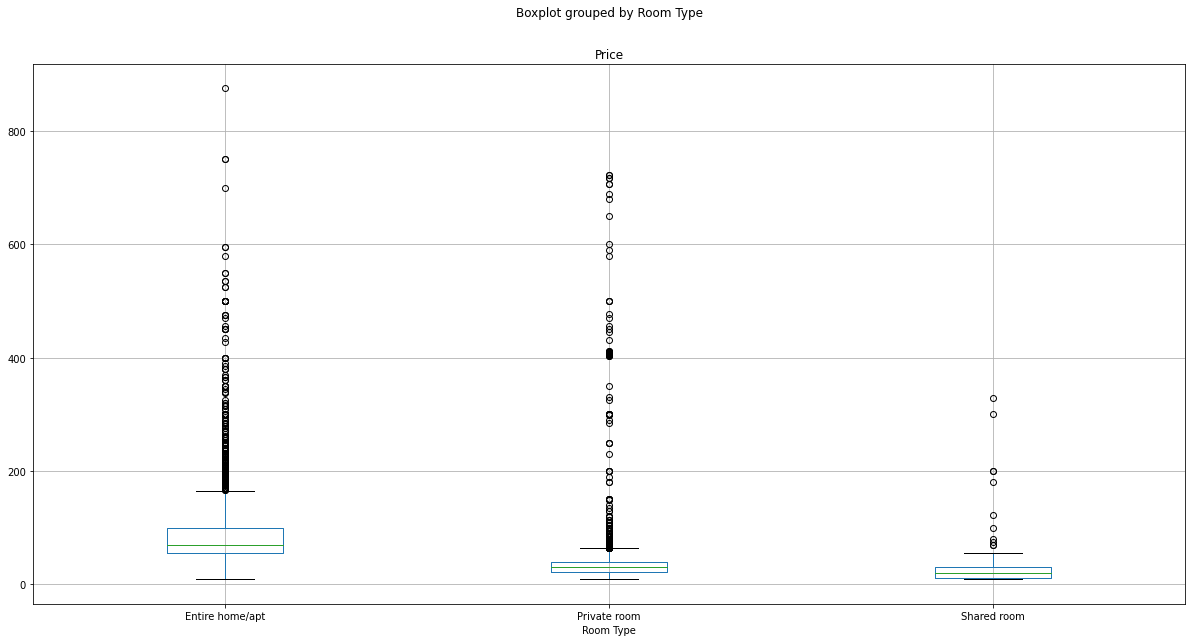

In [52]:
df.boxplot(by='Room Type', column='Price',figsize=(20, 10))

In [53]:
df['Room Type'] = df['Room Type'].replace({'Shared room':0, 'Private room':1, 'Entire home/apt':2})

<AxesSubplot:xlabel='Room Type', ylabel='Price'>

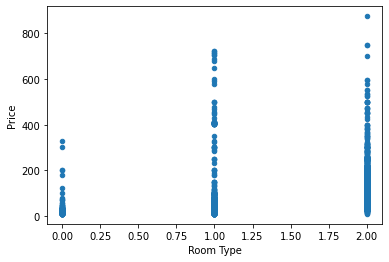

In [54]:
df.plot(kind = 'scatter',x='Room Type',y = 'Price')

In [55]:
df['Bed Type'].value_counts()

Real Bed         10421
Pull-out Sofa      200
Futon               28
Couch               14
Airbed               5
Name: Bed Type, dtype: int64

<AxesSubplot:title={'center':'Price'}, xlabel='Bed Type'>

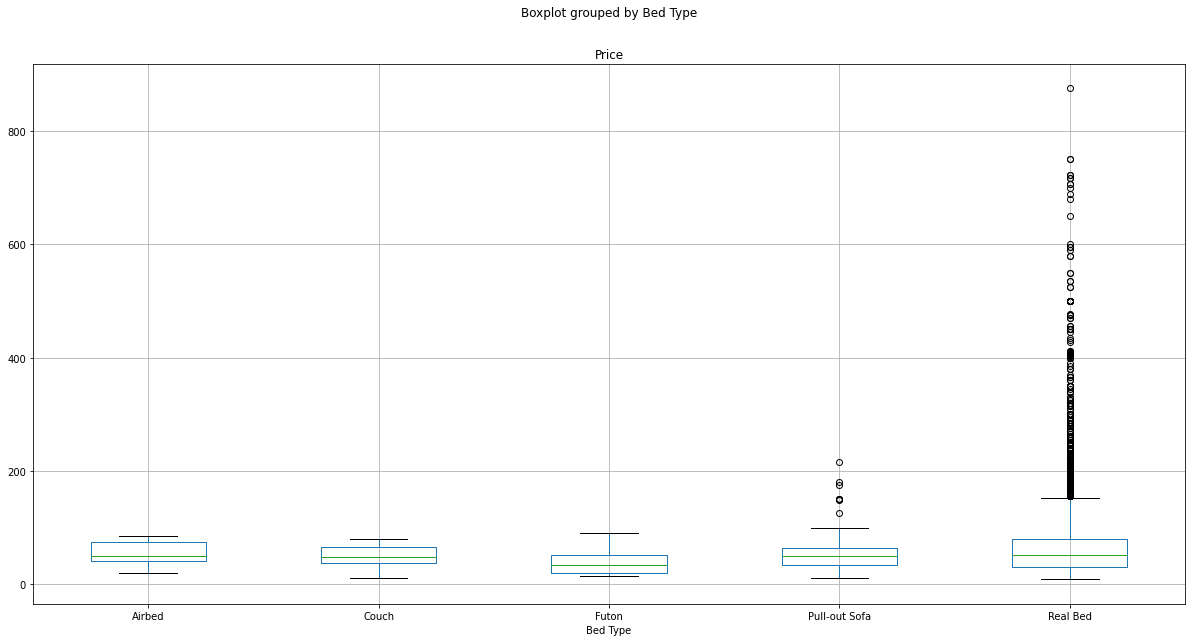

In [56]:
df.boxplot(by='Bed Type', column='Price',figsize=(20, 10))

In [57]:
df['Bed Type'] = df['Bed Type'].replace({'Couch':0, 'Airbed':1, 'Futon':2, 'Pull-out Sofa':3, 'Real Bed':4})

<AxesSubplot:xlabel='Bed Type', ylabel='Price'>

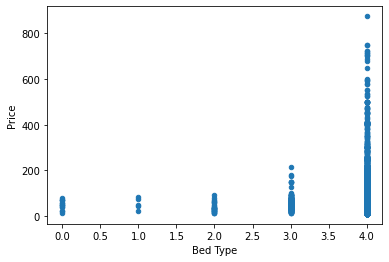

In [58]:
df.plot(kind = 'scatter',x='Bed Type',y = 'Price')

In [59]:
df['Cancellation Policy'].value_counts()

strict             4013
flexible           3457
moderate           3193
super_strict_60       4
super_strict_30       1
Name: Cancellation Policy, dtype: int64

<AxesSubplot:title={'center':'Price'}, xlabel='Cancellation Policy'>

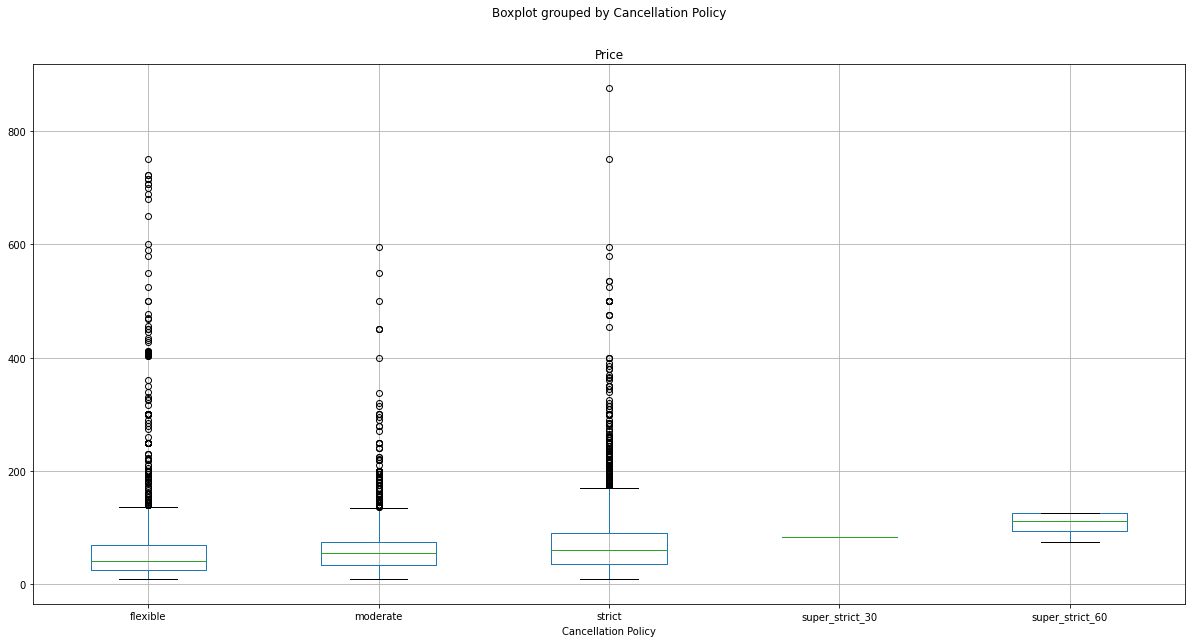

In [60]:
df.boxplot(by='Cancellation Policy', column='Price',figsize=(20, 10))

In [61]:
df['Cancellation Policy'] = df['Cancellation Policy'].replace({'flexible':0, 'moderate':1, 'strict':2, 'super_strict_30':3, 'super_strict_60':4})

<AxesSubplot:xlabel='Cancellation Policy', ylabel='Price'>

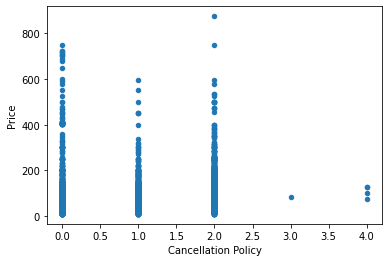

In [62]:
df.plot(kind = 'scatter',x='Cancellation Policy',y = 'Price')

In [63]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Host Response Rate,9306.0,94.855685,15.221090,0.000000,100.000000,100.000000,100.000000,100.000000
Latitude,10668.0,40.420617,0.020221,40.331888,40.410080,40.418644,40.427745,40.562736
Longitude,10668.0,-3.697213,0.023866,-3.863907,-3.707833,-3.701588,-3.693828,-3.526821
Room Type,10668.0,1.581740,0.521743,0.000000,1.000000,2.000000,2.000000,2.000000
Accommodates,10668.0,3.175947,1.988406,1.000000,2.000000,2.000000,4.000000,16.000000
Bathrooms,10624.0,1.249765,0.594224,0.000000,1.000000,1.000000,1.000000,8.000000
Bedrooms,10655.0,1.285312,0.815806,0.000000,1.000000,1.000000,1.000000,10.000000
Beds,10627.0,1.974687,1.498295,1.000000,1.000000,1.000000,2.000000,16.000000
Bed Type,10668.0,3.969348,0.231360,0.000000,4.000000,4.000000,4.000000,4.000000
Price,10661.0,66.993340,60.500843,9.000000,31.000000,52.000000,80.000000,875.000000


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Host Response Rate              9306 non-null   float64
 1   Latitude                        10668 non-null  float64
 2   Longitude                       10668 non-null  float64
 3   Room Type                       10668 non-null  int64  
 4   Accommodates                    10668 non-null  int64  
 5   Bathrooms                       10624 non-null  float64
 6   Bedrooms                        10655 non-null  float64
 7   Beds                            10627 non-null  float64
 8   Bed Type                        10668 non-null  int64  
 9   Price                           10661 non-null  float64
 10  Security Deposit                4533 non-null   float64
 11  Cleaning Fee                    6296 non-null   float64
 12  Guests Included                 

In [65]:
#por una parte
#el cleaning fee debiese estar sumado con el precio y el security deposit debiese 
#estar incluido en el precio ya.
#borrare security fee y sumare price y cleaning fee
#Por otra parte, cleaning fee debe tener sus valores NA como 0
df["Cleaning Fee"] = df["Cleaning Fee"].fillna(0)

In [66]:
df[["Security Deposit","Cleaning Fee"]].describe().T

,count,mean,std,min,25%,50%,75%,max
Security Deposit,4533.0,183.580852,109.583750,70.0,100.0,150.0,200.0,990.0
Cleaning Fee,10668.0,17.416948,24.424996,0.0,0.0,10.0,30.0,500.0


In [67]:
df['PriceUP'] = df['Price'] + df['Cleaning Fee']


(array([9.124e+03, 1.240e+03, 1.650e+02, 8.500e+01, 2.400e+01, 2.000e+01,
        1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([   9. ,  133.1,  257.2,  381.3,  505.4,  629.5,  753.6,  877.7,
        1001.8, 1125.9, 1250. ]),
 <BarContainer object of 10 artists>)

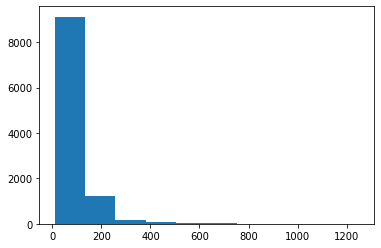

In [68]:
plt.hist(df['PriceUP'])

<AxesSubplot:xlabel='PriceUP', ylabel='PriceUP'>

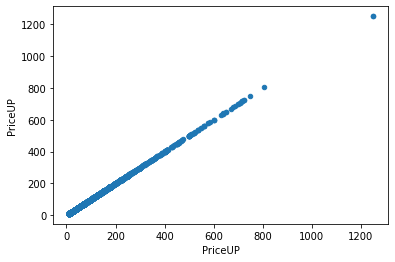

In [69]:
df.plot(kind = 'scatter',x='PriceUP',y = 'PriceUP')

In [70]:
#creo que estos pueden ser outliers, dado que son pocos, los eliminare
df[df['PriceUP']>900]

,Host Response Rate,Latitude,Longitude,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Price,...,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Cancellation Policy,Calculated host listings count,Years Being Host,PriceUP
2346,100.0,40.466047,-3.674320,2,10,5.0,5.0,9.0,4,875.0,...,0,0,0,261,0,NaN,2,39.0,2.0,1250.0
5766,100.0,40.469604,-3.736424,2,14,6.0,7.0,9.0,4,750.0,...,23,53,83,358,0,NaN,2,39.0,2.0,1250.0


In [71]:
df = df[df['PriceUP']<900]

<AxesSubplot:xlabel='PriceUP', ylabel='PriceUP'>

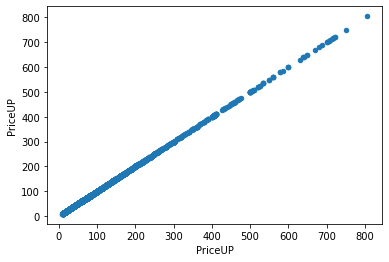

In [72]:
df.plot(kind = 'scatter',x='PriceUP',y = 'PriceUP')

(array([ 115.,  768., 1369., 1884., 2719., 2269., 1025.,  335.,  133.,
          42.]),
 array([2.19722458, 2.64658635, 3.09594812, 3.54530989, 3.99467166,
        4.44403343, 4.8933952 , 5.34275697, 5.79211874, 6.24148051,
        6.69084228]),
 <BarContainer object of 10 artists>)

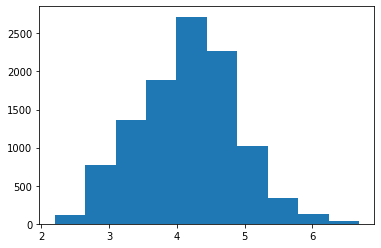

In [73]:
plt.hist(np.log(df['PriceUP']))

In [74]:
df = df.drop(['Security Deposit', 'Cleaning Fee'], axis =1)

In [75]:
#he aprovechado de cambiar price a log de priceup ya que tiene una mejor distribucion
df['logPriceUP'] = np.log(df['PriceUP'])

In [76]:
df = df.drop(['PriceUP'], axis =1)

In [77]:
df = df['logPriceUP'].to_frame().join(df.drop(['logPriceUP'], axis =1))

<AxesSubplot:xlabel='logPriceUP', ylabel='logPriceUP'>

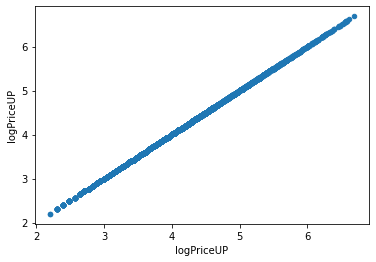

In [78]:
df.plot(kind = 'scatter',x='logPriceUP',y = 'logPriceUP')

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10659 entries, 0 to 10667
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   logPriceUP                      10659 non-null  float64
 1   Host Response Rate              9299 non-null   float64
 2   Latitude                        10659 non-null  float64
 3   Longitude                       10659 non-null  float64
 4   Room Type                       10659 non-null  int64  
 5   Accommodates                    10659 non-null  int64  
 6   Bathrooms                       10616 non-null  float64
 7   Bedrooms                        10646 non-null  float64
 8   Beds                            10619 non-null  float64
 9   Bed Type                        10659 non-null  int64  
 10  Price                           10659 non-null  float64
 11  Guests Included                 10659 non-null  int64  
 12  Extra People                    

<AxesSubplot:xlabel='Accommodates', ylabel='logPriceUP'>

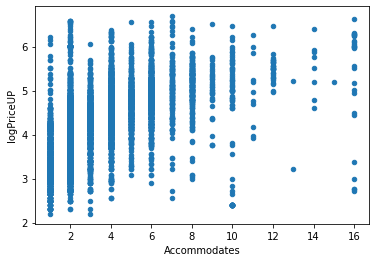

In [80]:
df.plot(kind = 'scatter',x='Accommodates',y = 'logPriceUP')

<AxesSubplot:xlabel='Guests Included', ylabel='logPriceUP'>

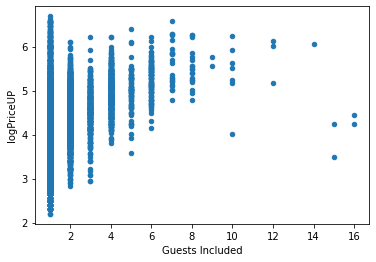

In [81]:
df.plot(kind = 'scatter',x='Guests Included',y = 'logPriceUP')

<AxesSubplot:xlabel='Extra People', ylabel='logPriceUP'>

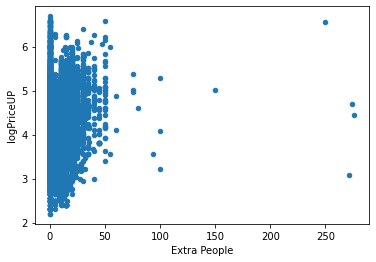

In [82]:
df.plot(kind = 'scatter',x='Extra People',y = 'logPriceUP')

In [83]:
df['Extra People'].describe()

count    10659.000000
mean         7.335960
std         10.628212
min          0.000000
25%          0.000000
50%          0.000000
75%         13.000000
max        276.000000
Name: Extra People, dtype: float64

In [84]:
df[df['Extra People'] > 30].describe().T

,count,mean,std,min,25%,50%,75%,max
logPriceUP,164.0,4.675253,0.728694,2.995732,4.158883,4.709490,5.107456,6.572283
Host Response Rate,143.0,93.489510,19.941064,0.000000,100.000000,100.000000,100.000000,100.000000
Latitude,164.0,40.424529,0.019278,40.384906,40.414401,40.422017,40.429007,40.504026
Longitude,164.0,-3.696915,0.020126,-3.737135,-3.706228,-3.699649,-3.693696,-3.577834
Room Type,164.0,1.634146,0.554119,0.000000,1.000000,2.000000,2.000000,2.000000
Accommodates,164.0,4.237805,2.888230,1.000000,2.000000,4.000000,6.000000,16.000000
Bathrooms,163.0,1.822086,1.374010,0.000000,1.000000,1.000000,2.000000,6.000000
Bedrooms,164.0,1.695122,1.163758,0.000000,1.000000,1.000000,2.000000,8.000000
Beds,164.0,2.750000,2.262999,1.000000,1.000000,2.000000,3.000000,14.000000
Bed Type,164.0,3.926829,0.436958,0.000000,4.000000,4.000000,4.000000,4.000000


In [85]:
df['Max_guests'] = df['Guests Included']+df['Extra People']

In [86]:
df['Extra_guests'] = df['Accommodates']-df['Guests Included']

<AxesSubplot:xlabel='Max_guests', ylabel='logPriceUP'>

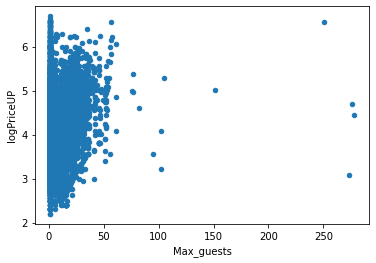

In [87]:
df.plot(kind = 'scatter',x='Max_guests',y = 'logPriceUP')

<AxesSubplot:xlabel='Max_guests', ylabel='logPriceUP'>

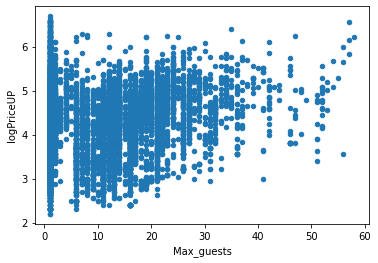

In [88]:
df[df['Max_guests']<60].plot(kind = 'scatter',x='Max_guests',y = 'logPriceUP')

In [89]:
df[df['Max_guests']<60].shape

(10643, 26)

<AxesSubplot:xlabel='Extra_guests', ylabel='logPriceUP'>

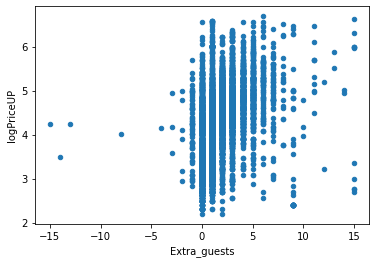

In [90]:
df.plot(kind = 'scatter',x='Extra_guests',y = 'logPriceUP')

<AxesSubplot:xlabel='Extra_guests', ylabel='logPriceUP'>

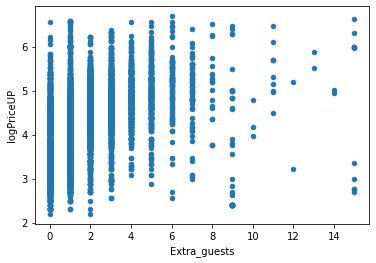

In [91]:
df[df['Extra_guests']>=0].plot(kind = 'scatter',x='Extra_guests',y = 'logPriceUP')

In [92]:
df[df['Extra_guests']>=0].shape

(10579, 26)

In [93]:
#la variable extra people es representativa generalmente de propiedades tipo hotel y no parece ser una variable que pueda explicar el precio por si sola
#guest included parece redundante con accommodates. dejare solo accommodates
#por otra parte, de las variables creadas la Extra_guest parece buena explicando precio, sin embargo tiene valores negativos, lo que no tiene sentido. 
df = df.drop(['Extra People', 'Guests Included', 'Extra_guests', 'Max_guests'], axis=1)

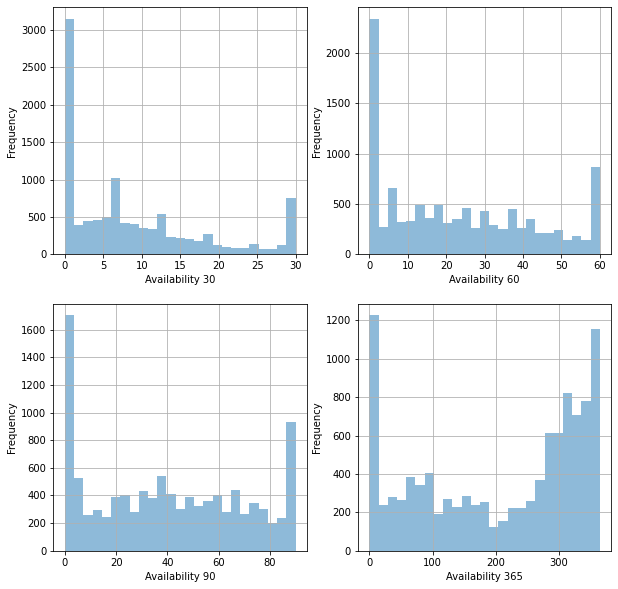

In [94]:
plt.figure(figsize=(10, 10))

plt.subplot(2,2,1)
df['Availability 30'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Availability 30')

plt.subplot(2,2,2)
df['Availability 60'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Availability 60')

plt.subplot(2,2,3)
df['Availability 90'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Availability 90')

plt.subplot(2,2,4)
df['Availability 365'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Availability 365')

plt.show()


In [95]:

df = df.drop(['Availability 30', 'Availability 60', 'Availability 90'], axis=1)
#creo que estas columnas estaran muy relacionadas y al igual que ocurria cono host reponse time, si tiene una disponibilidad de 60, debiese estar dentro la de 30, y estas dentro de la de 90.
#me quedare solo con 365

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10659 entries, 0 to 10667
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   logPriceUP                      10659 non-null  float64
 1   Host Response Rate              9299 non-null   float64
 2   Latitude                        10659 non-null  float64
 3   Longitude                       10659 non-null  float64
 4   Room Type                       10659 non-null  int64  
 5   Accommodates                    10659 non-null  int64  
 6   Bathrooms                       10616 non-null  float64
 7   Bedrooms                        10646 non-null  float64
 8   Beds                            10619 non-null  float64
 9   Bed Type                        10659 non-null  int64  
 10  Price                           10659 non-null  float64
 11  Minimum Nights                  10659 non-null  int64  
 12  Maximum Nights                  

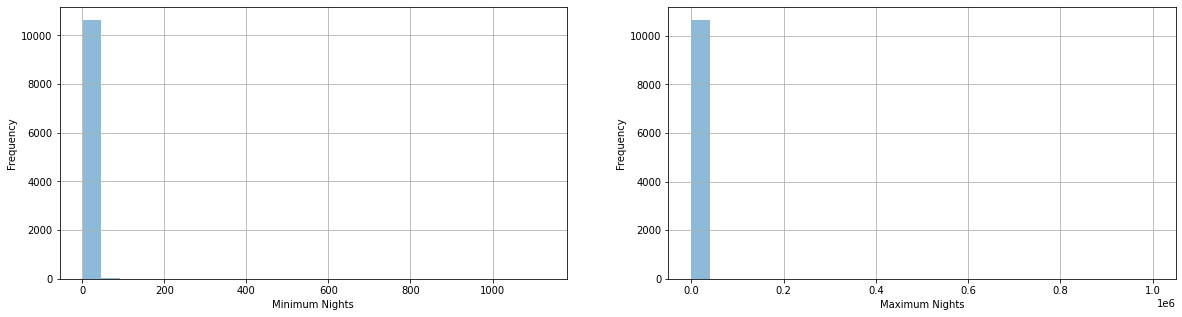

In [97]:
plt.figure(figsize=(20, 5))

plt.subplot(1,2,1)
df['Minimum Nights'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Minimum Nights')

plt.subplot(1,2,2)
df['Maximum Nights'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Maximum Nights')

plt.show()

<AxesSubplot:xlabel='Minimum Nights', ylabel='Maximum Nights'>

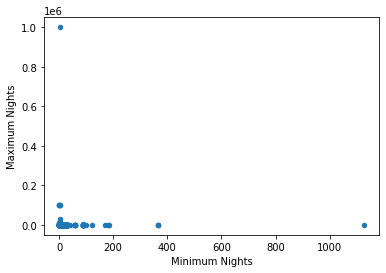

In [98]:
df.plot(kind = 'scatter',x='Minimum Nights',y = 'Maximum Nights')

<AxesSubplot:xlabel='Minimum Nights', ylabel='logPriceUP'>

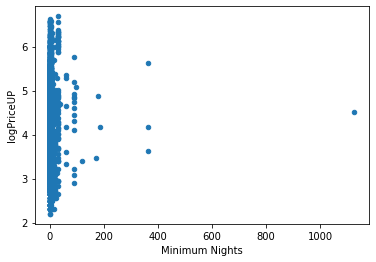

In [99]:
df.plot(kind = 'scatter',x='Minimum Nights',y = 'logPriceUP')

In [100]:
df['Minimum Nights'].describe()
#segun esto el maximo de noches minimas es mas de mil dias...

count    10659.000000
mean         3.039403
std         13.681220
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max       1125.000000
Name: Minimum Nights, dtype: float64

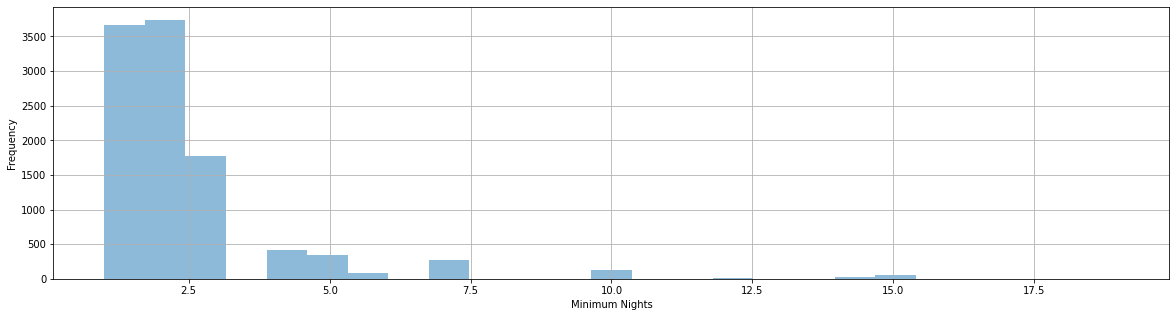

In [101]:
plt.figure(figsize=(20, 5))
df[df['Minimum Nights']<20]['Minimum Nights'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Minimum Nights')

plt.show()

In [102]:
df[df['Minimum Nights']<31].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10629 entries, 0 to 10667
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   logPriceUP                      10629 non-null  float64
 1   Host Response Rate              9278 non-null   float64
 2   Latitude                        10629 non-null  float64
 3   Longitude                       10629 non-null  float64
 4   Room Type                       10629 non-null  int64  
 5   Accommodates                    10629 non-null  int64  
 6   Bathrooms                       10586 non-null  float64
 7   Bedrooms                        10616 non-null  float64
 8   Beds                            10589 non-null  float64
 9   Bed Type                        10629 non-null  int64  
 10  Price                           10629 non-null  float64
 11  Minimum Nights                  10629 non-null  int64  
 12  Maximum Nights                  

<AxesSubplot:xlabel='Minimum Nights', ylabel='logPriceUP'>

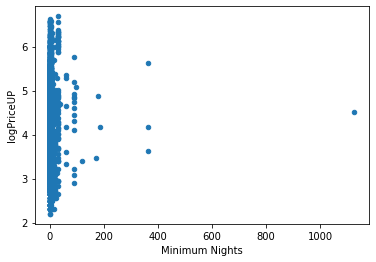

In [103]:
df.plot(kind = 'scatter',x='Minimum Nights',y = 'logPriceUP')

In [104]:
df['Maximum Nights'].describe()
#segun esto el maximo de noches son casi 3 anhos

count      10659.00000
mean         989.23445
std         9931.88078
min            1.00000
25%          365.00000
50%         1125.00000
75%         1125.00000
max      1000000.00000
Name: Maximum Nights, dtype: float64

In [105]:
df[df['Maximum Nights']<365].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2572 entries, 4 to 10666
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   logPriceUP                      2572 non-null   float64
 1   Host Response Rate              2241 non-null   float64
 2   Latitude                        2572 non-null   float64
 3   Longitude                       2572 non-null   float64
 4   Room Type                       2572 non-null   int64  
 5   Accommodates                    2572 non-null   int64  
 6   Bathrooms                       2567 non-null   float64
 7   Bedrooms                        2569 non-null   float64
 8   Beds                            2565 non-null   float64
 9   Bed Type                        2572 non-null   int64  
 10  Price                           2572 non-null   float64
 11  Minimum Nights                  2572 non-null   int64  
 12  Maximum Nights                  2

<AxesSubplot:xlabel='Minimum Nights', ylabel='logPriceUP'>

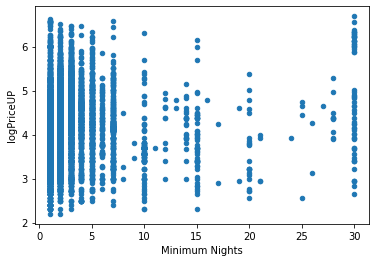

In [106]:
df[df['Minimum Nights']<31].plot(kind = 'scatter',x='Minimum Nights',y = 'logPriceUP')

<AxesSubplot:xlabel='Maximum Nights', ylabel='logPriceUP'>

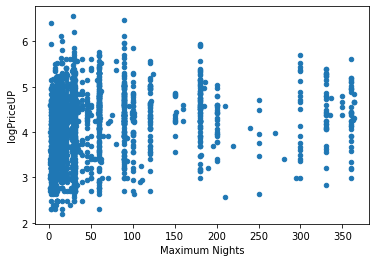

In [107]:
df[df['Maximum Nights']<365].plot(kind = 'scatter',x='Maximum Nights',y = 'logPriceUP')

In [108]:
#al parecer el precio tiene bastante ruido si lo tratamos de explicar con los dias minimos y maximos.
#a su vez estas varaibles pueden reflejar el hecho de que en airbnb hay dos mercados, uno de estancias cortas y otro que estancias largas, donde el precio
#podria calcularse de manera diferente, por ejemplo, ser mas bajo por dia, si son mas dias los reservados.
#prefiero descartarlas dado que tampoco parecen aportar mucho a este nivel

df = df.drop(['Minimum Nights','Maximum Nights'], axis =1)

In [109]:
df.shape

(10659, 17)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10659 entries, 0 to 10667
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   logPriceUP                      10659 non-null  float64
 1   Host Response Rate              9299 non-null   float64
 2   Latitude                        10659 non-null  float64
 3   Longitude                       10659 non-null  float64
 4   Room Type                       10659 non-null  int64  
 5   Accommodates                    10659 non-null  int64  
 6   Bathrooms                       10616 non-null  float64
 7   Bedrooms                        10646 non-null  float64
 8   Beds                            10619 non-null  float64
 9   Bed Type                        10659 non-null  int64  
 10  Price                           10659 non-null  float64
 11  Availability 365                10659 non-null  int64  
 12  Number of Reviews               

In [111]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
logPriceUP,10659.0,4.164797,0.726329,2.197225,3.637586,4.234107,4.653960,6.690842
Host Response Rate,9299.0,94.862566,15.194446,0.000000,100.000000,100.000000,100.000000,100.000000
Latitude,10659.0,40.420606,0.020217,40.331888,40.410078,40.418630,40.427727,40.562736
Longitude,10659.0,-3.697211,0.023869,-3.863907,-3.707833,-3.701589,-3.693833,-3.526821
Room Type,10659.0,1.581574,0.521792,0.000000,1.000000,2.000000,2.000000,2.000000
Accommodates,10659.0,3.172999,1.983678,1.000000,2.000000,2.000000,4.000000,16.000000
Bathrooms,10616.0,1.248257,0.589392,0.000000,1.000000,1.000000,1.000000,8.000000
Bedrooms,10646.0,1.283956,0.812803,0.000000,1.000000,1.000000,1.000000,10.000000
Beds,10619.0,1.972785,1.494106,1.000000,1.000000,1.000000,2.000000,16.000000
Bed Type,10659.0,3.969322,0.231456,0.000000,4.000000,4.000000,4.000000,4.000000


In [112]:
df["Host Response Rate"].fillna(df["Host Response Rate"].mean(), inplace=True)

In [113]:
df["Bathrooms"].fillna(df["Bathrooms"].mean(), inplace=True)

In [114]:
df["Bedrooms"].fillna(df["Bedrooms"].mean(), inplace=True)

In [115]:
df["Beds"].fillna(df["Beds"].mean(), inplace=True)

In [116]:
df["Review Scores Rating"].fillna(df["Review Scores Rating"].mean(), inplace=True)

In [117]:
df["Years Being Host"].fillna(df["Years Being Host"].mean(), inplace=True)

In [118]:
df = df['Price'].to_frame().join(df.drop(['Price'], axis =1))

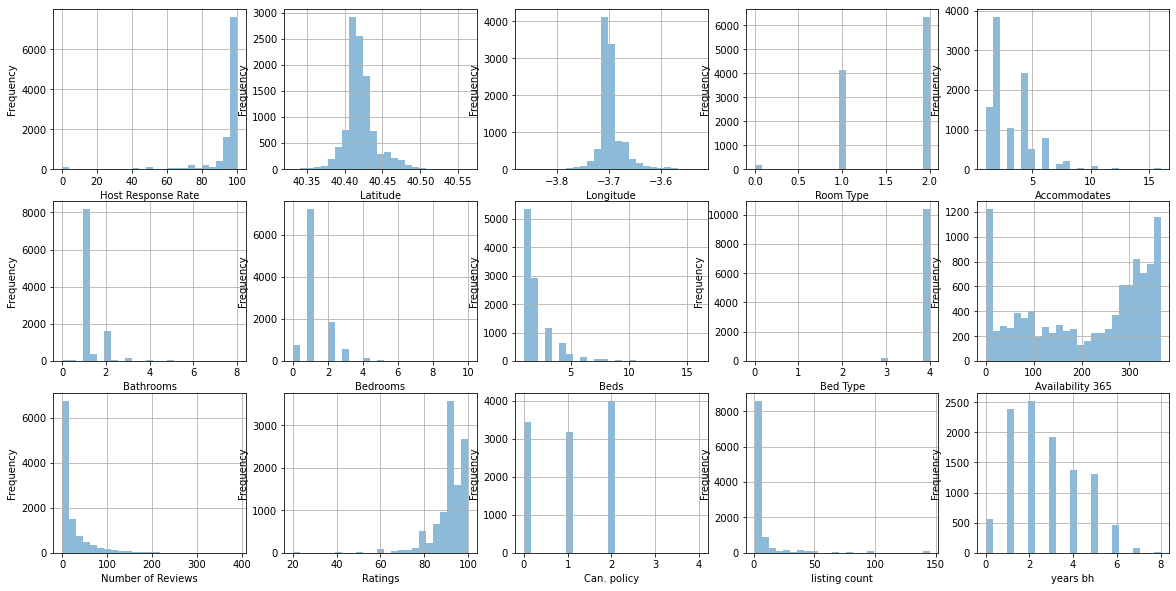

In [119]:
plt.figure(figsize=(20, 10))

plt.subplot(3,5,1)
df['Host Response Rate'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Host Response Rate')

plt.subplot(3,5,2)
df['Latitude'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Latitude')

plt.subplot(3,5,3)
df['Longitude'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Longitude')

plt.subplot(3,5,4)
df['Room Type'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Room Type')

plt.subplot(3,5,5)
df['Accommodates'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Accommodates')

plt.subplot(3,5,6)
df['Bathrooms'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Bathrooms')

plt.subplot(3,5,7)
df['Bedrooms'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Bedrooms')

plt.subplot(3,5,8)
df['Beds'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Beds')

plt.subplot(3,5,9)
df['Bed Type'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Bed Type')

plt.subplot(3,5,10)
df['Availability 365'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Availability 365')

plt.subplot(3,5,11)
df['Number of Reviews'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Number of Reviews')

plt.subplot(3,5,12)
df['Review Scores Rating'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Ratings')

plt.subplot(3,5,13)
df['Cancellation Policy'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Can. policy')

plt.subplot(3,5,14)
df['Calculated host listings count'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('listing count')

plt.subplot(3,5,15)
df['Years Being Host'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('years bh')


plt.show()


In [120]:
dfPRICE = df.drop(['logPriceUP'], axis =1)

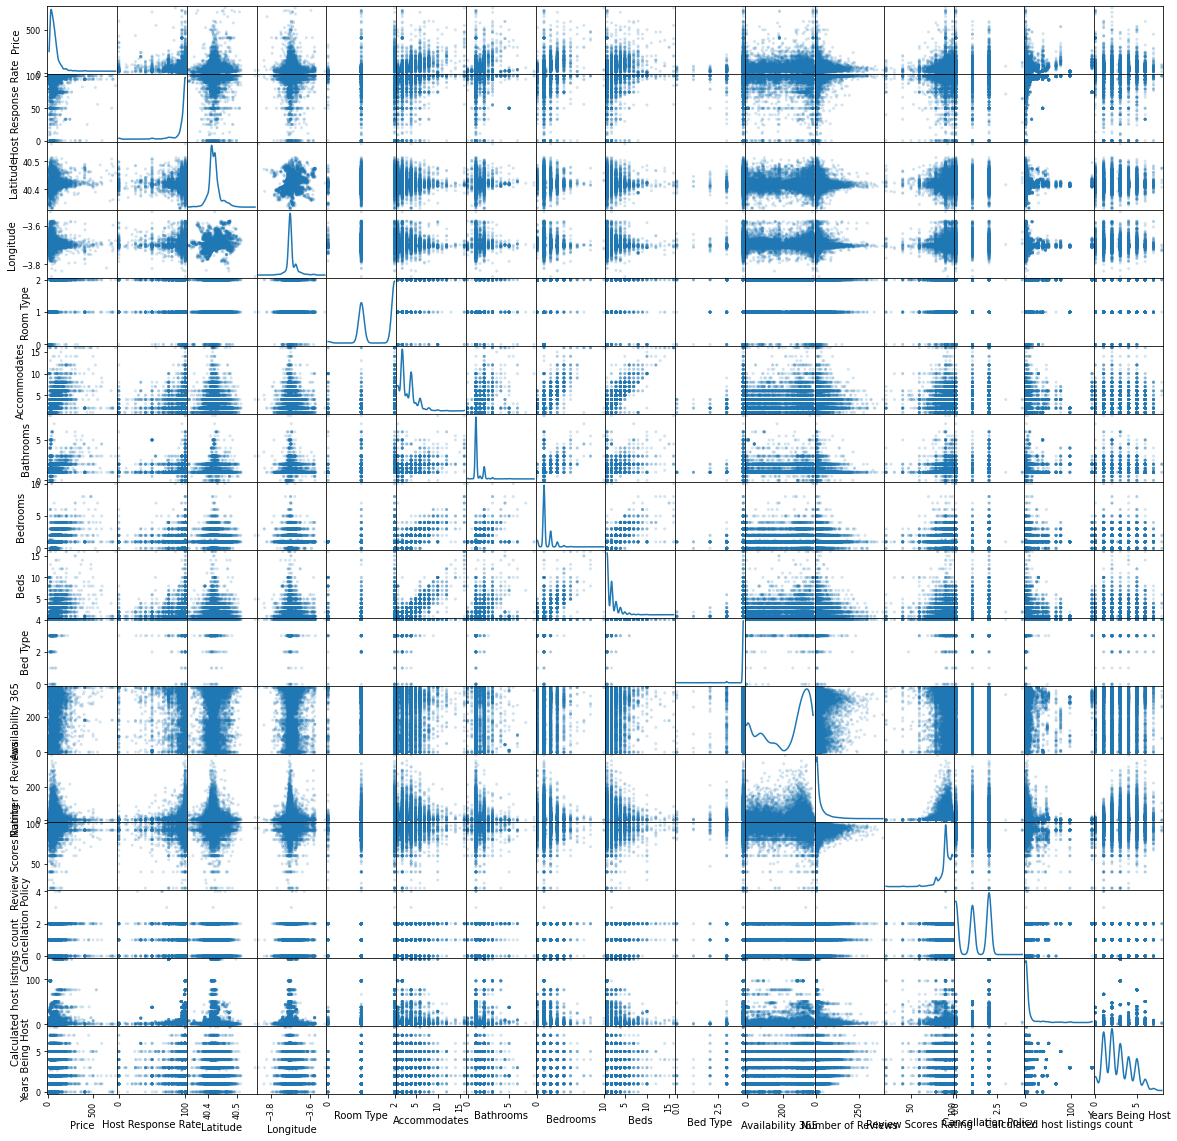

In [121]:
pd.plotting.scatter_matrix(dfPRICE, alpha=0.2, figsize=(20, 20), diagonal = 'kde')
plt.show()

In [122]:
dflogPriceUP = df.drop(['Price'], axis =1)

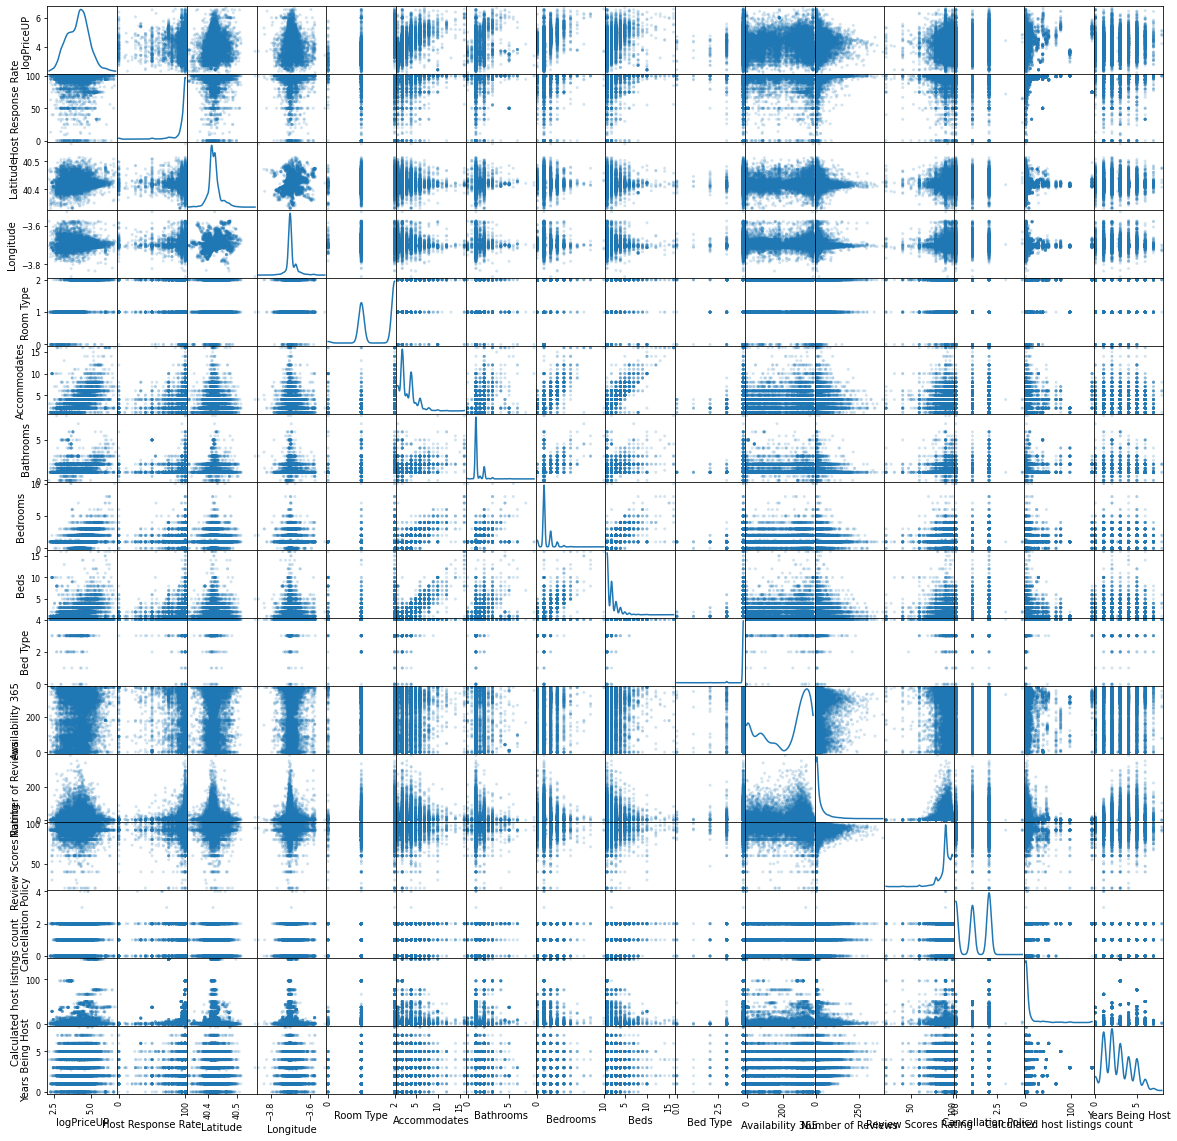

In [123]:
pd.plotting.scatter_matrix(dflogPriceUP, alpha=0.2, figsize=(20, 20), diagonal = 'kde')
plt.show()

In [124]:
#creo que con estos datos yo puedo probar con una regresion lineal (lasso) en DFlogPRICE y un decision tree regression en el DFPRICE

In [180]:
#primero regresion con lasso en el dflogPRiceUP

dflogPriceUP.corr()

,logPriceUP,Host Response Rate,Latitude,Longitude,Room Type,Accommodates,Bathrooms,Bedrooms,Bed Type,Availability 365,Number of Reviews,Review Scores Rating,Cancellation Policy,Calculated host listings count,Years Being Host
logPriceUP,1.000000,0.040471,0.100486,-0.075115,0.694966,0.594289,0.198706,0.437995,0.023387,0.100563,0.029375,0.036762,0.236893,0.191559,0.126742
Host Response Rate,0.040471,1.000000,-0.034696,-0.036116,0.073571,0.059242,-0.040863,0.009922,-0.003911,-0.032536,0.133598,0.071326,0.076309,-0.069164,0.045319
Latitude,0.100486,-0.034696,1.000000,0.222501,0.004725,-0.005107,0.030998,0.025201,0.014502,0.031634,-0.058876,-0.002301,-0.045971,0.004713,0.005629
Longitude,-0.075115,-0.036116,0.222501,1.000000,-0.066689,-0.055326,-0.000504,0.005559,0.000965,-0.001821,-0.031325,0.032573,-0.059504,-0.041339,-0.018649
Room Type,0.694966,0.073571,0.004725,-0.066689,1.000000,0.491090,-0.026205,0.247239,-0.000641,-0.015885,0.141230,-0.008514,0.215118,0.088752,0.117896
Accommodates,0.594289,0.059242,-0.005107,-0.055326,0.491090,1.000000,0.328585,0.671478,0.038127,0.075211,0.088007,-0.055165,0.225328,0.127956,0.088531
Bathrooms,0.198706,-0.040863,0.030998,-0.000504,-0.026205,0.328585,1.000000,0.402289,0.044060,-0.009073,-0.059582,0.012311,0.126503,0.182744,0.022952
Bedrooms,0.437995,0.009922,0.025201,0.005559,0.247239,0.671478,0.402289,1.000000,0.068154,0.024906,-0.026696,0.011655,0.088843,0.070750,0.039991
Bed Type,0.023387,-0.003911,0.014502,0.000965,-0.000641,0.038127,0.044060,0.068154,1.000000,0.020085,-0.002476,-0.006301,-0.007056,0.007129,-0.007558
Availability 365,0.100563,-0.032536,0.031634,-0.001821,-0.015885,0.075211,-0.009073,0.024906,0.020085,1.000000,0.083403,-0.079622,0.099074,0.083219,0.124440


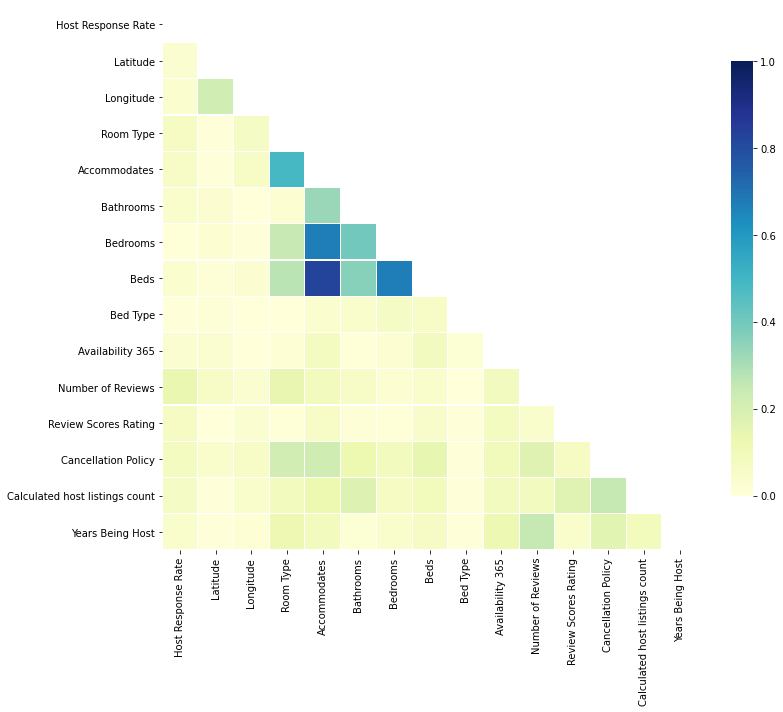

In [126]:
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(dflogPriceUP.drop(['logPriceUP'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

In [127]:
df_to_corr = dflogPriceUP.drop(['logPriceUP'], axis =1)
corr_matrix = df_to_corr.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

# Drop features 
dflogPriceUP.drop(to_drop, axis=1, inplace=True)

In [128]:
dflogPriceUP.shape

(10659, 15)

In [129]:
dflogPriceUP = dflogPriceUP.dropna()

In [130]:
dflogPriceUP.shape

(10659, 15)

In [131]:
dflogPriceUP.describe().T

,count,mean,std,min,25%,50%,75%,max
logPriceUP,10659.0,4.164797,0.726329,2.197225,3.637586,4.234107,4.653960,6.690842
Host Response Rate,10659.0,94.862566,14.191941,0.000000,94.862566,100.000000,100.000000,100.000000
Latitude,10659.0,40.420606,0.020217,40.331888,40.410078,40.418630,40.427727,40.562736
Longitude,10659.0,-3.697211,0.023869,-3.863907,-3.707833,-3.701589,-3.693833,-3.526821
Room Type,10659.0,1.581574,0.521792,0.000000,1.000000,2.000000,2.000000,2.000000
Accommodates,10659.0,3.172999,1.983678,1.000000,2.000000,2.000000,4.000000,16.000000
Bathrooms,10659.0,1.248257,0.588202,0.000000,1.000000,1.000000,1.000000,8.000000
Bedrooms,10659.0,1.283956,0.812307,0.000000,1.000000,1.000000,1.000000,10.000000
Bed Type,10659.0,3.969322,0.231456,0.000000,4.000000,4.000000,4.000000,4.000000
Availability 365,10659.0,206.341402,126.966234,0.000000,85.000000,248.000000,321.000000,365.000000


In [132]:
from sklearn import preprocessing
data = dflogPriceUP.values
y_train = data[:,0:1]     # nos quedamos con la 1ª columna, logPriceUP
X_train = data[:,1:]      # nos quedamos con el resto
feature_names = df.columns[1:]
# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

best mean cross-validation score: -0.199
best parameters: {'alpha': 0.002335721469090121}


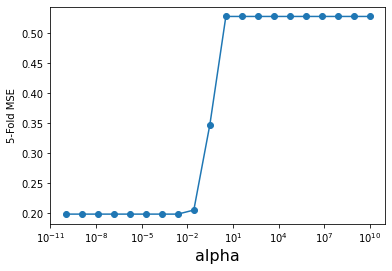

In [140]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

alpha_vector = np.logspace(-10,10,20)

param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 5)
grid.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('5-Fold MSE')
plt.show()

In [141]:
df_test = pd.read_csv('./test.csv', sep=';', decimal='.')

# aplicarle LAS MISMAS transformaciones que hayáis hecho en train 
#(drop de columnas, filtros, generaciones, fill...) y sacar los datos:


In [142]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2667 entries, 0 to 2666
Data columns (total 89 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              2667 non-null   int64  
 1   Listing Url                     2667 non-null   object 
 2   Scrape ID                       2667 non-null   int64  
 3   Last Scraped                    2667 non-null   object 
 4   Name                            2667 non-null   object 
 5   Summary                         2587 non-null   object 
 6   Space                           1957 non-null   object 
 7   Description                     2666 non-null   object 
 8   Experiences Offered             2667 non-null   object 
 9   Neighborhood Overview           1662 non-null   object 
 10  Notes                           1027 non-null   object 
 11  Transit                         1661 non-null   object 
 12  Access                          15

In [143]:
df_test = df_test[['Price','Cleaning Fee','Host Response Rate','Latitude','Longitude','Room Type',
                  'Accommodates','Bathrooms','Bedrooms','Bed Type',
                  'Availability 365','Number of Reviews','Review Scores Rating',
                  'Cancellation Policy','Calculated host listings count','Host Since']]

In [144]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2667 entries, 0 to 2666
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Price                           2665 non-null   float64
 1   Cleaning Fee                    1555 non-null   float64
 2   Host Response Rate              2316 non-null   float64
 3   Latitude                        2667 non-null   float64
 4   Longitude                       2667 non-null   float64
 5   Room Type                       2667 non-null   object 
 6   Accommodates                    2667 non-null   int64  
 7   Bathrooms                       2661 non-null   float64
 8   Bedrooms                        2657 non-null   float64
 9   Bed Type                        2667 non-null   object 
 10  Availability 365                2667 non-null   int64  
 11  Number of Reviews               2667 non-null   int64  
 12  Review Scores Rating            20

In [145]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2667 entries, 0 to 2666
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Price                           2665 non-null   float64
 1   Cleaning Fee                    1555 non-null   float64
 2   Host Response Rate              2316 non-null   float64
 3   Latitude                        2667 non-null   float64
 4   Longitude                       2667 non-null   float64
 5   Room Type                       2667 non-null   object 
 6   Accommodates                    2667 non-null   int64  
 7   Bathrooms                       2661 non-null   float64
 8   Bedrooms                        2657 non-null   float64
 9   Bed Type                        2667 non-null   object 
 10  Availability 365                2667 non-null   int64  
 11  Number of Reviews               2667 non-null   int64  
 12  Review Scores Rating            20

In [146]:
df_test['logPriceUP'] = np.log(df_test['Price'] + df_test['Cleaning Fee'].fillna(0))

In [147]:
df_test['Host Since'] = pd.to_datetime(df_test['Host Since'])

In [148]:
df_test['Years Being Host'] = df_test['Host Since'].apply(lambda x: 2017 - x.year)

In [149]:
df_test['Cancellation Policy'] = df_test['Cancellation Policy'].replace({'flexible':0, 'moderate':1, 'strict':2, 'super_strict_30':3, 'super_strict_60':4})

In [150]:
df_test['Room Type'] = df_test['Room Type'].replace({'Shared room':0, 'Private room':1, 'Entire home/apt':2})

In [151]:
df_test['Bed Type'] = df_test['Bed Type'].replace({'Couch':0, 'Airbed':1, 'Futon':2, 'Pull-out Sofa':3, 'Real Bed':4})

In [152]:
df_test = df_test.drop(['Host Since', 'Price', 'Cleaning Fee'],axis=1)

In [153]:
df_test["Host Response Rate"].fillna(df_test["Host Response Rate"].mean(), inplace=True)

In [154]:
df_test["Bathrooms"].fillna(df_test["Bathrooms"].mean(), inplace=True)

In [155]:
df_test["Bedrooms"].fillna(df_test["Bedrooms"].mean(), inplace=True)

In [156]:
df_test["Review Scores Rating"].fillna(df_test["Review Scores Rating"].mean(), inplace=True)

In [157]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2667 entries, 0 to 2666
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Host Response Rate              2667 non-null   float64
 1   Latitude                        2667 non-null   float64
 2   Longitude                       2667 non-null   float64
 3   Room Type                       2667 non-null   int64  
 4   Accommodates                    2667 non-null   int64  
 5   Bathrooms                       2667 non-null   float64
 6   Bedrooms                        2667 non-null   float64
 7   Bed Type                        2667 non-null   int64  
 8   Availability 365                2667 non-null   int64  
 9   Number of Reviews               2667 non-null   int64  
 10  Review Scores Rating            2667 non-null   float64
 11  Cancellation Policy             2667 non-null   int64  
 12  Calculated host listings count  26

In [158]:
df_test = df_test['logPriceUP'].to_frame().join(df_test.drop(['logPriceUP'], axis =1))

In [159]:
df_test = df_test.dropna()

In [160]:
data_test = df_test.values
y_test = data_test[:,0:1]     # nos quedamos con la 1ª columna, logPriceUP
X_test = data_test[:,1:]      # nos quedamos con el resto
feature_names_test = df_test.columns[1:]

# recordad que esta normalización/escalado la realizo con el scaler anterior, basado en los datos de training!
XtestScaled = scaler.transform(X_test) 

In [161]:
from sklearn.metrics import mean_squared_error

alpha_optimo = grid.best_params_['alpha']
lasso = Lasso(alpha = alpha_optimo).fit(XtrainScaled,y_train)

ytrainLasso = lasso.predict(XtrainScaled)
ytestLasso = lasso.predict(XtestScaled)
mseTrainModelLasso = mean_squared_error((np.e)**y_train, (np.e)**ytrainLasso)
mseTestModelLasso = mean_squared_error((np.e)**y_test, (np.e)**ytestLasso)

print('MSE Modelo Lasso (train): %0.3g' %mseTrainModelLasso)
print('MSE Modelo Lasso (test): %0.3g' %mseTestModelLasso)
print('RMSE Modelo Lasso (train): %0.3g' %np.sqrt(mseTrainModelLasso))
print('RMSE Modelo Lasso (test): %0.3g' %np.sqrt(mseTestModelLasso))
w = lasso.coef_



MSE Modelo Lasso (train): 3.02e+03
MSE Modelo Lasso (test): 3.93e+03
RMSE Modelo Lasso (train): 55
RMSE Modelo Lasso (test): 62.7


In [163]:
for f,wi in zip(feature_names_test,w):
    print(f,wi.round(2))

Host Response Rate -0.0
Latitude 0.07
Longitude -0.03
Room Type 0.41
Accommodates 0.14
Bathrooms 0.05
Bedrooms 0.09
Bed Type 0.0
Availability 365 0.06
Number of Reviews -0.05
Review Scores Rating 0.05
Cancellation Policy 0.03
Calculated host listings count 0.06
Years Being Host 0.02


In [ ]:
#no es un muy buen modelo, pero parece generalizar bien. las diferenciias entres trian y test no son grandes a mi parecer
#si fuese por hacerlo mas sencillo probaria con un modelo con solo room Type y Acoomodates, aun cuando estas variables estan correladas debilmente

In [164]:
#ahora probamos con decisionTreeregression

In [165]:
df_test['PriceUP'] = (np.e)**df_test['logPriceUP']

In [166]:
df_test = df_test.drop(['logPriceUP'], axis =1)

In [167]:
df_test = df_test['PriceUP'].to_frame().join(df_test.drop(['PriceUP'], axis =1))

In [168]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2665 entries, 0 to 2666
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   PriceUP                         2665 non-null   float64
 1   Host Response Rate              2665 non-null   float64
 2   Latitude                        2665 non-null   float64
 3   Longitude                       2665 non-null   float64
 4   Room Type                       2665 non-null   int64  
 5   Accommodates                    2665 non-null   int64  
 6   Bathrooms                       2665 non-null   float64
 7   Bedrooms                        2665 non-null   float64
 8   Bed Type                        2665 non-null   int64  
 9   Availability 365                2665 non-null   int64  
 10  Number of Reviews               2665 non-null   int64  
 11  Review Scores Rating            2665 non-null   float64
 12  Cancellation Policy             26

In [169]:
df_test = df_test['PriceUP'].to_frame().join(df_test.drop(['PriceUP'], axis =1))

In [170]:
data_test = df_test.values
y_test = data_test[:,0:1]     # nos quedamos con la 1ª columna, logPriceUP
X_test = data_test[:,1:]      # nos quedamos con el resto
feature_names_test = df_test.columns[1:]

# recordad que esta normalización/escalado la realizo con el scaler anterior, basado en los datos de training!
XtestScaled = scaler.transform(X_test) 

In [171]:
data = dfPRICE.values 

y = data[:,0:1]     # nos quedamos con la 1ª columna, price
X = data[:,1:]      # nos quedamos con el resto

feature_names = dfPRICE.columns[1:]

# Dividimos los datos en entrenamiento y test (80 training, 20 test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state = 2)

print('Datos entrenamiento: ', X_train.shape)
print('Datos test: ', X_test.shape)

Datos entrenamiento:  (7994, 15)
Datos test:  (2665, 15)


best mean cross-validation score: 0.463
best parameters: {'max_depth': 6}


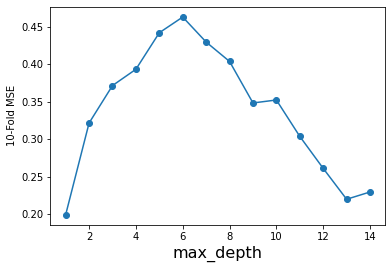

In [172]:
from sklearn.tree import DecisionTreeRegressor

maxDepth = range(1,15)
param_grid = {'max_depth': maxDepth }
grid = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid=param_grid, cv = 10)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth',fontsize=16)
plt.ylabel('10-Fold MSE')
plt.show()

In [176]:
maxDepthOptimo = 6
treeModel = DecisionTreeRegressor(max_depth=maxDepthOptimo).fit(X_train,y_train)

print("Train: ",treeModel.score(X_train,y_train).round(2))
print("Test: ",treeModel.score(X_test,y_test).round(2))

Train:  0.61
Test:  0.45


In [ ]:
#en este caso, el accuracy es bastante diferente entre train y test y tenemos overfitting

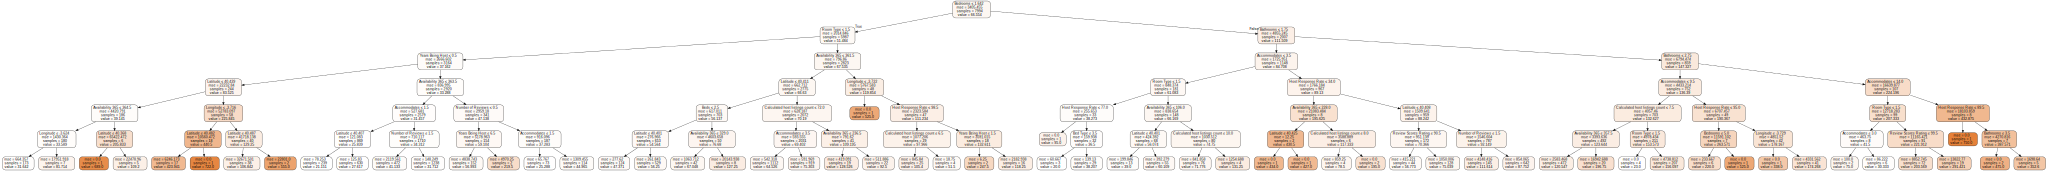

In [177]:
from sklearn.tree import export_graphviz
import graphviz

tree_dot = export_graphviz(treeModel, out_file=None, feature_names=feature_names,  
                         filled=True, rounded=True,  special_characters=True)
graph = graphviz.Source(tree_dot) 
graph

In [197]:
from sklearn import tree

text_representation = tree.export_text(treeModel)
print(text_representation)

|--- feature_6 <= 1.64
|   |--- feature_3 <= 1.50
|   |   |--- feature_14 <= 0.50
|   |   |   |--- feature_1 <= 40.44
|   |   |   |   |--- feature_9 <= 364.50
|   |   |   |   |   |--- feature_2 <= -3.62
|   |   |   |   |   |   |--- value: [31.64]
|   |   |   |   |   |--- feature_2 >  -3.62
|   |   |   |   |   |   |--- value: [81.71]
|   |   |   |   |--- feature_9 >  364.50
|   |   |   |   |   |--- feature_1 <= 40.37
|   |   |   |   |   |   |--- value: [689.00]
|   |   |   |   |   |--- feature_1 >  40.37
|   |   |   |   |   |   |--- value: [109.20]
|   |   |   |--- feature_1 >  40.44
|   |   |   |   |--- feature_2 <= -3.72
|   |   |   |   |   |--- feature_1 <= 40.48
|   |   |   |   |   |   |--- value: [423.94]
|   |   |   |   |   |--- feature_1 >  40.48
|   |   |   |   |   |   |--- value: [722.00]
|   |   |   |   |--- feature_2 >  -3.72
|   |   |   |   |   |--- feature_1 <= 40.49
|   |   |   |   |   |   |--- value: [106.84]
|   |   |   |   |   |--- feature_1 >  40.49
|   |   |   |   |  

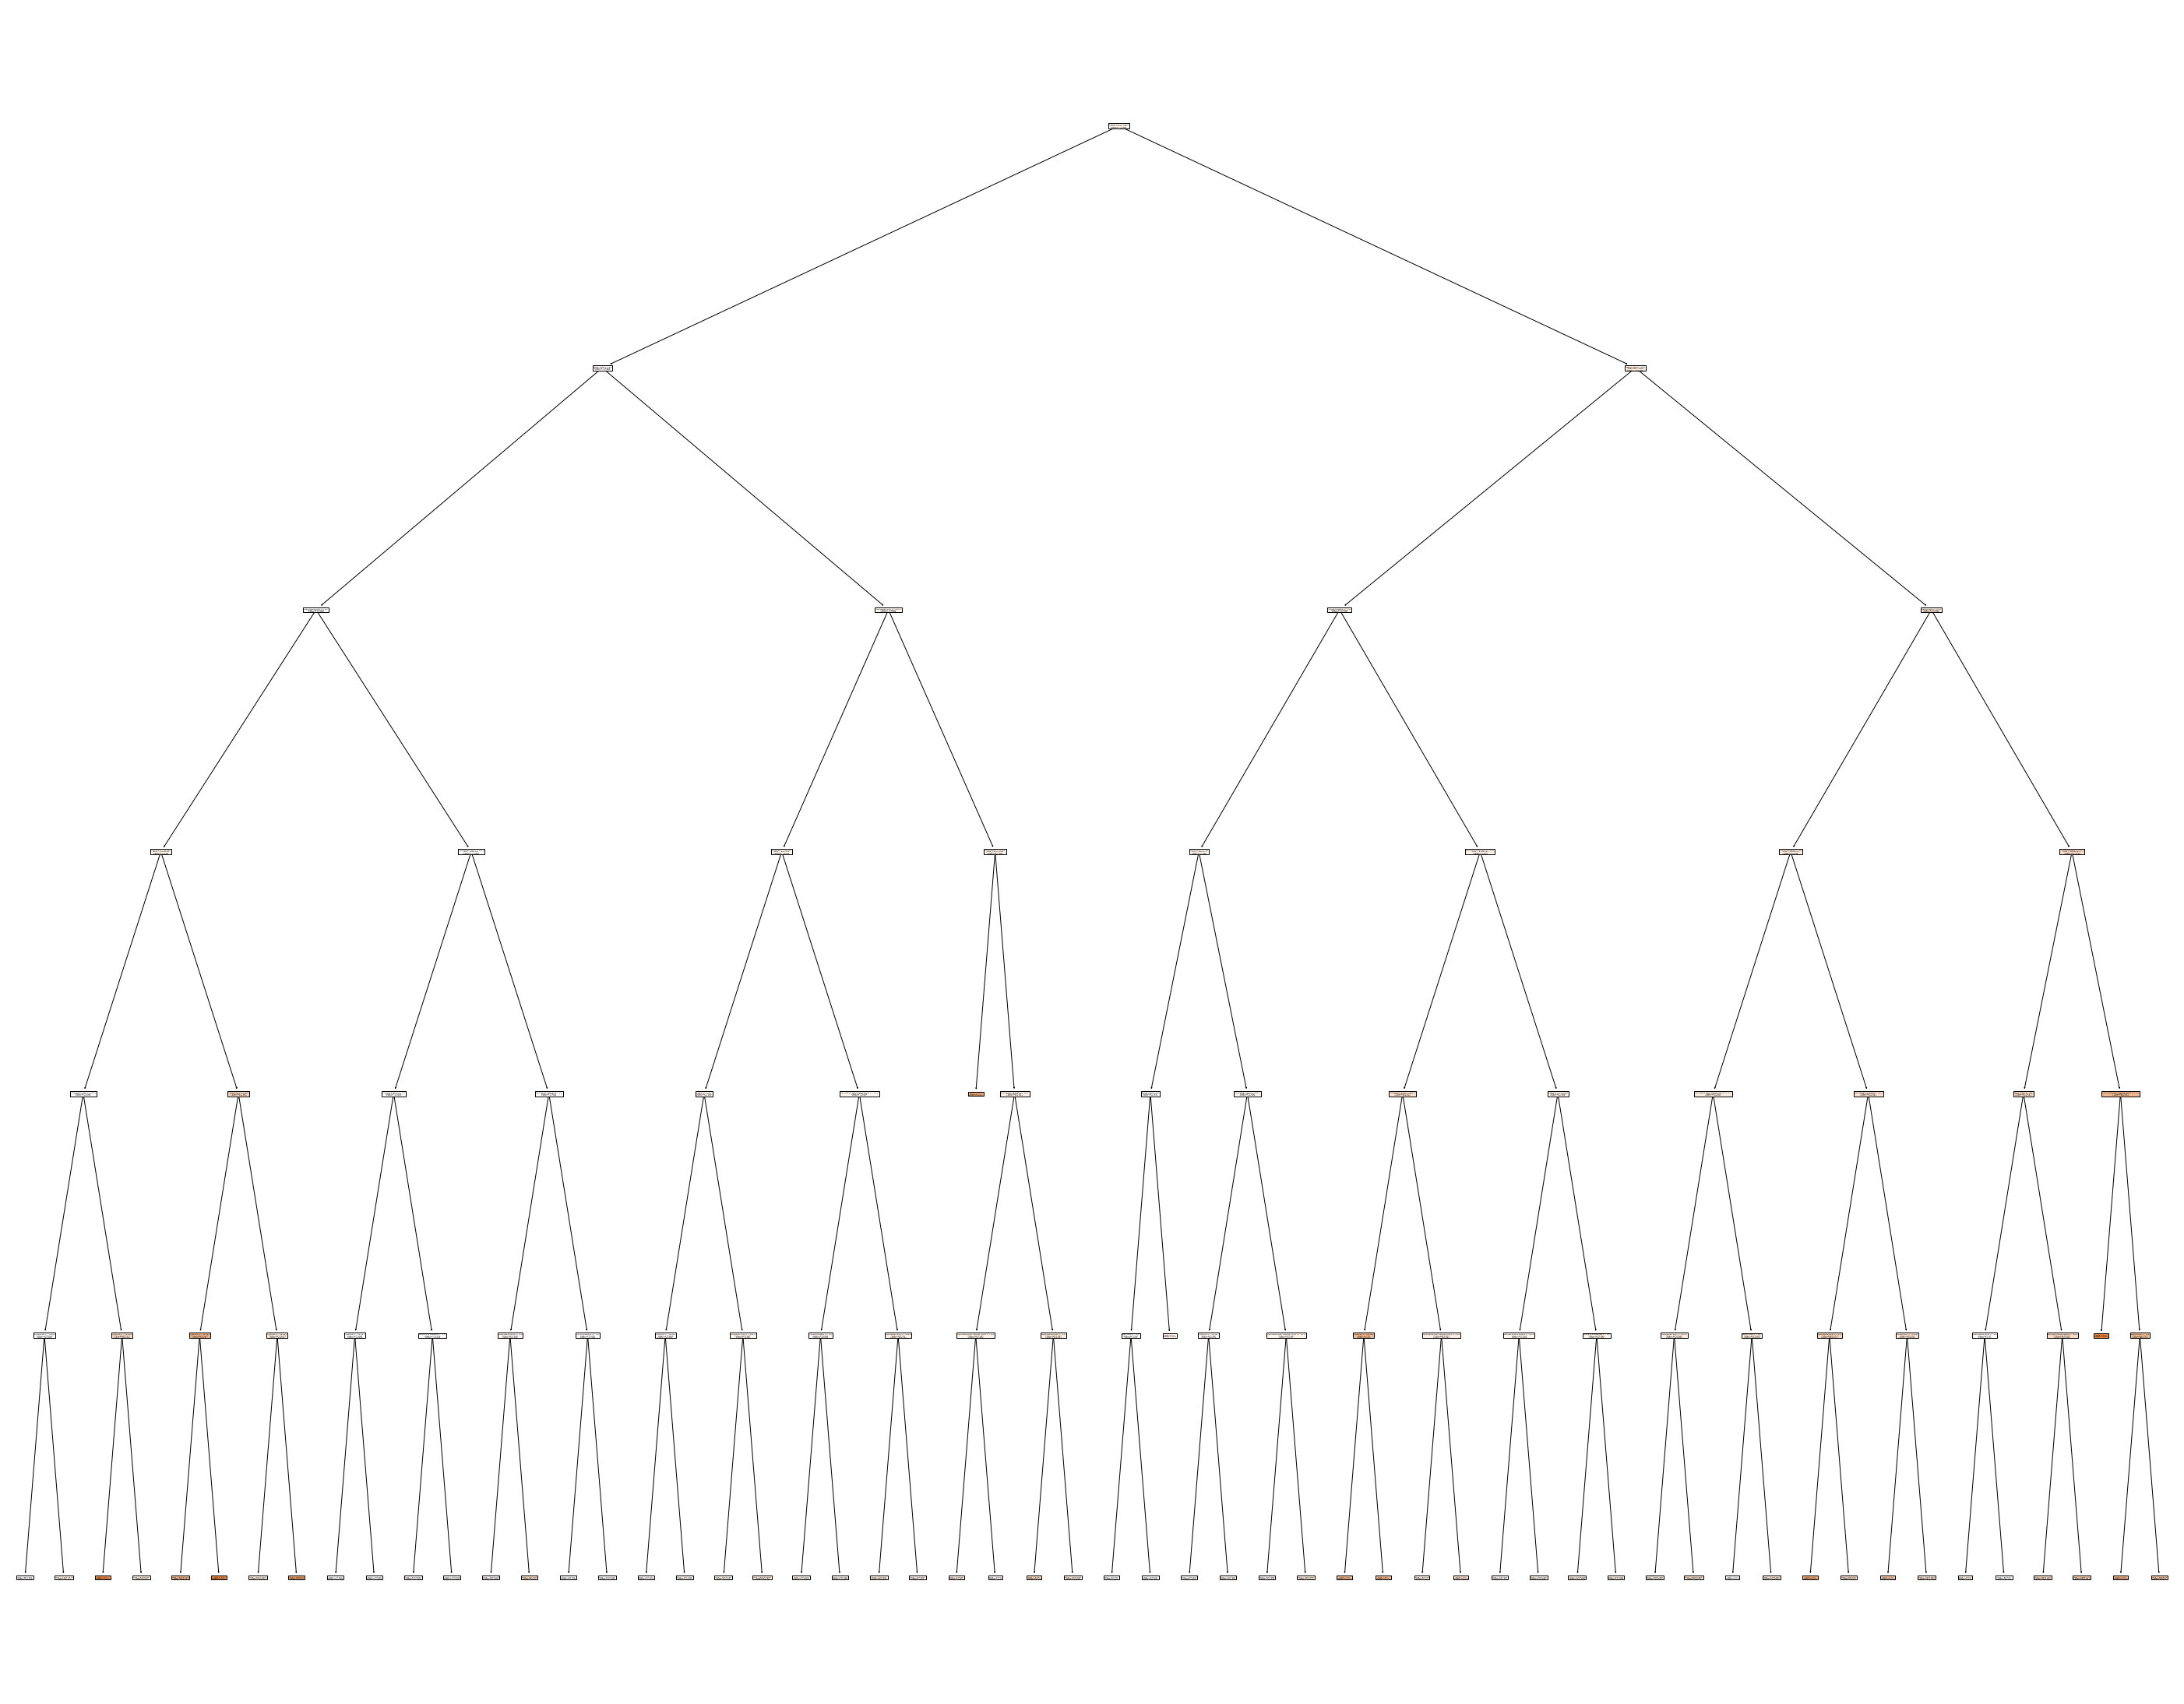

In [198]:
fig = plt.figure(figsize=(50,40))
_ = tree.plot_tree(treeModel, 
                   feature_names=feature_names,
                   filled=True)

In [200]:
#fig.savefig("decision_tree.png")

In [182]:
dfPRICE.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10659 entries, 0 to 10667
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Price                           10659 non-null  float64
 1   Host Response Rate              10659 non-null  float64
 2   Latitude                        10659 non-null  float64
 3   Longitude                       10659 non-null  float64
 4   Room Type                       10659 non-null  int64  
 5   Accommodates                    10659 non-null  int64  
 6   Bathrooms                       10659 non-null  float64
 7   Bedrooms                        10659 non-null  float64
 8   Beds                            10659 non-null  float64
 9   Bed Type                        10659 non-null  int64  
 10  Availability 365                10659 non-null  int64  
 11  Number of Reviews               10659 non-null  int64  
 12  Review Scores Rating            

In [184]:
dfPRICE.corr(method='spearman')

,Price,Host Response Rate,Latitude,Longitude,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Availability 365,Number of Reviews,Review Scores Rating,Cancellation Policy,Calculated host listings count,Years Being Host
Price,1.000000,0.062158,0.127276,-0.025939,0.721032,0.674150,0.198136,0.445777,0.519089,0.029710,0.046994,0.046650,0.065683,0.175704,0.127253,0.107904
Host Response Rate,0.062158,1.000000,-0.032457,-0.011930,0.117925,0.136415,-0.000659,0.055271,0.099976,0.007084,0.043184,0.320657,0.130027,0.132709,0.075095,0.075147
Latitude,0.127276,-0.032457,1.000000,0.168422,0.021167,0.014742,0.033715,0.021722,0.022296,0.011597,0.028983,-0.074456,0.004026,-0.012197,-0.002229,0.017990
Longitude,-0.025939,-0.011930,0.168422,1.000000,-0.035340,-0.049278,0.024602,0.010790,-0.008184,0.004625,0.001152,-0.010039,0.030834,-0.040342,-0.061964,-0.008874
Room Type,0.721032,0.117925,0.021167,-0.035340,1.000000,0.654028,-0.002854,0.276301,0.452504,-0.026435,-0.067420,0.206849,-0.008327,0.219900,0.098135,0.115341
Accommodates,0.674150,0.136415,0.014742,-0.049278,0.654028,1.000000,0.236339,0.566411,0.776088,0.032237,0.014499,0.203439,-0.029320,0.241815,0.202890,0.110829
Bathrooms,0.198136,-0.000659,0.033715,0.024602,-0.002854,0.236339,1.000000,0.382460,0.284444,0.054936,0.010134,-0.055471,0.031081,0.111905,0.148519,0.041544
Bedrooms,0.445777,0.055271,0.021722,0.010790,0.276301,0.566411,0.382460,1.000000,0.621437,0.096439,-0.003607,0.027648,0.030328,0.083892,0.028244,0.041468
Beds,0.519089,0.099976,0.022296,-0.008184,0.452504,0.776088,0.284444,0.621437,1.000000,0.082367,0.046962,0.135542,-0.011838,0.157028,0.143326,0.081156
Bed Type,0.029710,0.007084,0.011597,0.004625,-0.026435,0.032237,0.054936,0.096439,0.082367,1.000000,0.014794,-0.035909,-0.005633,-0.013442,0.019511,-0.013401


In [ ]:
#otros algoritmos podrian ser random forest o una regresion lineal 
#utilizando solo Room type y accommodates como predictores

#de los dos algoritmos que he provado en este ejercicio elegiria lasso.